In [505]:
# For Analysis
import numpy as np
import pandas as pd

# For Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import pylab


from scipy.stats import norm
#import pysal as ps

# For Calculations
import math
import scipy.stats as stats
from math import floor

#For Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel

#For Modeling
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# For Validation
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.metrics import confusion_matrix

# For Storing Models
import pickle
%matplotlib inline

In [506]:

with open('new_listings_English_keep_pun.csv') as f:
    new_listings_english_pun = pd.read_csv(f)
f.close()
print(new_listings_english_pun.head())


with open('new_listings_French_English_keep_pun.csv') as f:
    new_listings_French_English_keep_pun = pd.read_csv(f)
f.close()
print(new_listings_French_English_keep_pun.head())

   Unnamed: 0      id                          listing_url       scrape_id  \
0           0   28925   https://www.airbnb.com/rooms/28925  20211211051501   
1           1  218103  https://www.airbnb.com/rooms/218103  20211211051501   
2           2  222887  https://www.airbnb.com/rooms/222887  20211211051501   
3           3  317273  https://www.airbnb.com/rooms/317273  20211211051501   
4           4  317658  https://www.airbnb.com/rooms/317658  20211211051501   

  last_scraped                                               name  \
0   2021-12-11     Grande maison centre ville Comme à la campagne   
1   2021-12-11                 B&B Apart.Suite  / tropical garden   
2   2021-12-11     Bordeaux Terrace - spectacular view, fast Wifi   
3   2021-12-11  Bordeaux City Gardens - large 1 bd, park adjacent   
4   2021-12-11  Key to Bordeaux - fairytale view, 2 bd + elevator   

                                         description  \
0  If you just open the housedoor, you'll feel li...   
1  <

In [507]:
#select the hotel that exist in both english and (english+French)comments dataset

vals =  set(new_listings_english_pun['id']).intersection(new_listings_French_English_keep_pun['id']) 

print(len(vals))

new_listings_english = new_listings_english_pun[new_listings_english_pun['id'].isin(vals)]

print(len(new_listings_French_English_keep_pun))
print(new_listings_French_English_keep_pun.nunique())
print("=====================")
new_listings = new_listings_French_English_keep_pun[new_listings_French_English_keep_pun['id'].isin(vals)]
print(len(new_listings))
new_listings.nunique()

5390
7964
Unnamed: 0                                     7964
id                                             7964
listing_url                                    7964
scrape_id                                         1
last_scraped                                      2
                                               ... 
calculated_host_listings_count_shared_rooms       5
reviews_per_month                               649
listing_id                                     7964
sentiment pattern                              7481
sentiment_bert                                 1299
Length: 78, dtype: int64
5390


Unnamed: 0                                     5390
id                                             5390
listing_url                                    5390
scrape_id                                         1
last_scraped                                      2
                                               ... 
calculated_host_listings_count_shared_rooms       5
reviews_per_month                               628
listing_id                                     5390
sentiment pattern                              5254
sentiment_bert                                 1291
Length: 78, dtype: int64

In [508]:
columns_to_keep = ['id', 'host_since', 'host_is_superhost', 'host_identity_verified',
                   'neighbourhood', 'neighbourhood_cleansed', 
                   'neighbourhood_group_cleansed', 'latitude', 'longitude',
                   'property_type', 'room_type', 'accommodates', 'bathrooms', 
                   'bedrooms', 'beds', 'price', 'minimum_nights','number_of_reviews',
                   'first_review', 'last_review', 'reviews_per_month','sentiment pattern','sentiment_bert']

english = new_listings_english[columns_to_keep]#.set_index('id')
print("{} rows and {} columns - after dropping irrelevant columns.".format(*english.shape))
print(english)

englishFrench = new_listings[columns_to_keep]#.set_index('id')
print("{} rows and {} columns - after dropping irrelevant columns.".format(*englishFrench.shape))
print(englishFrench)

5390 rows and 23 columns - after dropping irrelevant columns.
            id  host_since host_is_superhost host_identity_verified  \
0        28925  2010-05-13                 f                      f   
1       218103  2011-09-08                 t                      t   
2       222887  2011-09-14                 t                      t   
3       317273  2011-09-14                 t                      t   
4       317658  2011-09-14                 t                      t   
...        ...         ...               ...                    ...   
5385  53333751  2019-05-02                 f                      t   
5386  53338865  2014-06-21                 t                      t   
5387  53497088  2015-10-05                 f                      t   
5388  53588359  2020-01-27                 f                      t   
5389  53606150  2017-07-21                 f                      t   

                             neighbourhood  \
0              Bordeaux, Aquitaine, Fra

In [31]:
print("\n----------- Minimum -----------\n")
print(english.min())
 
print("\n----------- Maximum -----------\n")
print(english.max())

print("\n----------- DataType -----------\n")
print(english.dtypes)


----------- Minimum -----------

id                                          28925
host_since                             2010-05-13
host_is_superhost                               f
host_identity_verified                          f
neighbourhood_cleansed               3M-Bourgailh
neighbourhood_group_cleansed    Ambars-et-Lagrave
latitude                                  44.7522
longitude                                 -0.7927
property_type                                Boat
room_type                         Entire home/apt
accommodates                                    0
bathrooms                                     NaN
bedrooms                                        1
beds                                            1
price                                       $0.00
minimum_nights                                  1
number_of_reviews                               1
first_review                           2011-11-11
last_review                            2014-06-09
reviews_per_mont

In [32]:
print("\n----------- Minimum -----------\n")
print(englishFrench.min())
 
print("\n----------- Maximum -----------\n")
print(englishFrench.max())

print("\n----------- DataType -----------\n")
print(englishFrench.dtypes)


----------- Minimum -----------

id                                          28925
host_since                             2010-05-13
host_is_superhost                               f
host_identity_verified                          f
neighbourhood_cleansed               3M-Bourgailh
neighbourhood_group_cleansed    Ambars-et-Lagrave
latitude                                  44.7522
longitude                                 -0.7927
property_type                                Boat
room_type                         Entire home/apt
accommodates                                    0
bathrooms                                     NaN
bedrooms                                        1
beds                                            1
price                                       $0.00
minimum_nights                                  1
number_of_reviews                               1
first_review                           2011-11-11
last_review                            2014-06-09
reviews_per_mont

In [509]:
print(english['price'].describe())
print(englishFrench['price'].describe())


count       5390
unique       307
top       $50.00
freq         266
Name: price, dtype: object
count       5390
unique       307
top       $50.00
freq         266
Name: price, dtype: object


In [510]:
english.price = english.price.str.replace('$', '').str.replace(',', '').astype(float)
englishFrench.price = englishFrench.price.str.replace('$', '').str.replace(',', '').astype(float)
print(english['price'].describe())
print(englishFrench['price'].describe())

count    5390.000000
mean       90.338776
std       114.582843
min         0.000000
25%        45.000000
50%        65.000000
75%       100.000000
max      5300.000000
Name: price, dtype: float64
count    5390.000000
mean       90.338776
std       114.582843
min         0.000000
25%        45.000000
50%        65.000000
75%       100.000000
max      5300.000000
Name: price, dtype: float64


C:\Users\amand\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [499]:
print(sum(english['price']))
print(sum(englishFrench['price']))

486926.0
486926.0


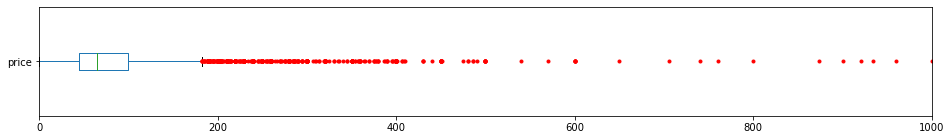

In [10]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
english['price'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

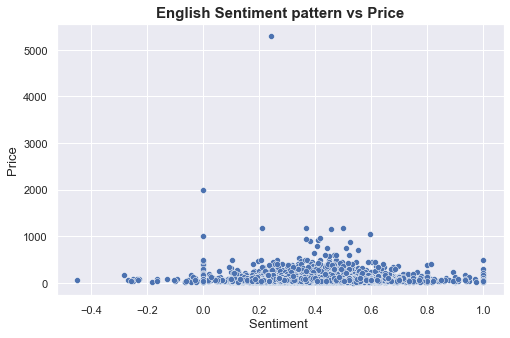

Text(0.5, 1.0, 'English Sentiment bert vs Price')

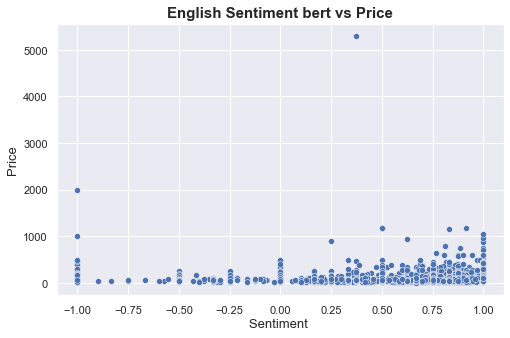

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sentiment pattern', y= 'price', data=english)

plt.xlabel("Sentiment ", size=13)
plt.ylabel("Price", size=13)
plt.title("English Sentiment pattern vs Price",size=15, weight='bold')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='sentiment_bert', y='price', data=english)

plt.xlabel("Sentiment ", size=13)
plt.ylabel("Price", size=13)
plt.title("English Sentiment bert vs Price",size=15, weight='bold')

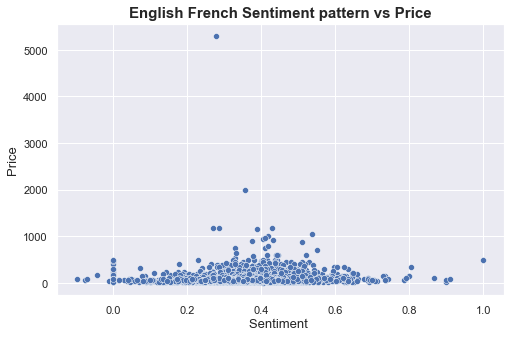

Text(0.5, 1.0, 'English French Sentiment bert vs Price')

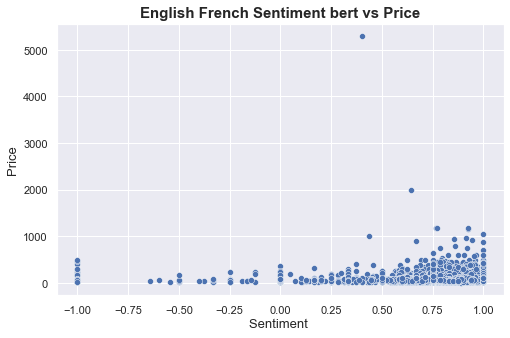

In [63]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='sentiment pattern', y= 'price', data=englishFrench)

plt.xlabel("Sentiment ", size=13)
plt.ylabel("Price", size=13)
plt.title("English French Sentiment pattern vs Price",size=15, weight='bold')
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='sentiment_bert', y='price', data=englishFrench)

plt.xlabel("Sentiment ", size=13)
plt.ylabel("Price", size=13)
plt.title("English French Sentiment bert vs Price",size=15, weight='bold')

In [511]:
print(english.isna().sum())
print(len(english))
print("=================")
print(englishFrench.isna().sum())
print(len(englishFrench))

id                                 0
host_since                         0
host_is_superhost                  0
host_identity_verified             0
neighbourhood                   1703
neighbourhood_cleansed             0
neighbourhood_group_cleansed       0
latitude                           0
longitude                          0
property_type                      0
room_type                          0
accommodates                       0
bathrooms                       5390
bedrooms                         608
beds                             144
price                              0
minimum_nights                     0
number_of_reviews                  0
first_review                       0
last_review                        0
reviews_per_month                  0
sentiment pattern                  0
sentiment_bert                     0
dtype: int64
5390
id                                 0
host_since                         0
host_is_superhost                  0
host_identity_verifi

In [512]:
def treat_missing(dt):
    temp = dt.copy()
    
  
    
    # Fill missing values for some columns with 0,for beds fillwith 1 because people try to book a shelter in airbnb, it is impossible they dont need bed.
    temp.bedrooms.fillna(0, inplace = True)
    temp.beds.fillna(1, inplace = True)
    

    
    # Drop the columns that have a lot of missing values and are not useful for analysis
    temp.drop(['first_review','last_review', 'host_since','neighbourhood','bathrooms','neighbourhood_group_cleansed'], axis = 1, inplace = True)
    
    return temp

In [513]:
english_clean = treat_missing(english)
englishFrench_clean= treat_missing(englishFrench)


In [514]:
print(english_clean.isna().sum())
print(englishFrench_clean.isna().sum())

id                        0
host_is_superhost         0
host_identity_verified    0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
number_of_reviews         0
reviews_per_month         0
sentiment pattern         0
sentiment_bert            0
dtype: int64
id                        0
host_is_superhost         0
host_identity_verified    0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bedrooms                  0
beds                      0
price                     0
minimum_nights            0
number_of_reviews         0
reviews_per_month         0
sentiment pattern         0
sentiment_bert            0
dtype: int64


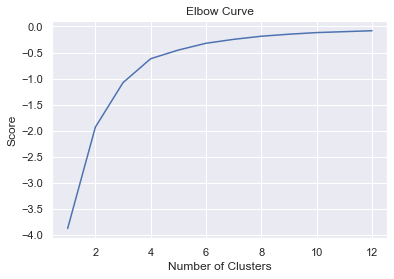

,id,latitude,longitude
0,28925,44.85024,-0.59209
1,218103,44.81545,-0.54808
2,222887,44.83611,-0.56640
3,317273,44.84782,-0.58105
4,317658,44.83882,-0.56887
5,333031,44.84256,-0.57794
6,333592,44.84583,-0.58306
7,365993,44.81149,-0.55825
8,408270,44.81562,-0.54787
9,410267,44.81443,-0.54876


In [515]:
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
K_clusters = range(1,13)


kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = english_clean[['latitude']]
X_axis = english_clean[['longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
# Visualize
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()
X=english_clean.loc[:,['id','latitude','longitude']]
X_FrenchEnglish=englishFrench_clean.loc[:,['id','latitude','longitude']]
X.head(10)

In [516]:
# create a new location cluster feature 
#there is 12 regions according to the map, so we set 12 clusters

kmeans = KMeans(n_clusters = 12, init ='k-means++')

# Compute k-means clustering
kmeans.fit(X[X.columns[1:3]]) 
X['cluster_location'] = kmeans.fit_predict(X[X.columns[1:3]])
X_FrenchEnglish['cluster_location'] = kmeans.fit_predict(X_FrenchEnglish[X_FrenchEnglish.columns[1:3]])
# Coordinates of cluster centers
centers = kmeans.cluster_centers_ 

# Labels of each point
labels = kmeans.predict(X[X.columns[1:3]]) 
labels_FrenchEnglish = kmeans.predict(X_FrenchEnglish[X_FrenchEnglish.columns[1:3]]) 
print(X.head(10))

print(X_FrenchEnglish.head(10))

       id  latitude  longitude  cluster_location
0   28925  44.85024   -0.59209                 4
1  218103  44.81545   -0.54808                10
2  222887  44.83611   -0.56640                 0
3  317273  44.84782   -0.58105                 4
4  317658  44.83882   -0.56887                 0
5  333031  44.84256   -0.57794                 0
6  333592  44.84583   -0.58306                 4
7  365993  44.81149   -0.55825                10
8  408270  44.81562   -0.54787                10
9  410267  44.81443   -0.54876                10
       id  latitude  longitude  cluster_location
0   28925  44.85024   -0.59209                 9
1  218103  44.81545   -0.54808                 7
2  222887  44.83611   -0.56640                 6
3  317273  44.84782   -0.58105                 9
4  317658  44.83882   -0.56887                 6
5  333031  44.84256   -0.57794                 6
6  333592  44.84583   -0.58306                 9
7  365993  44.81149   -0.55825                 7
8  408270  44.81562 

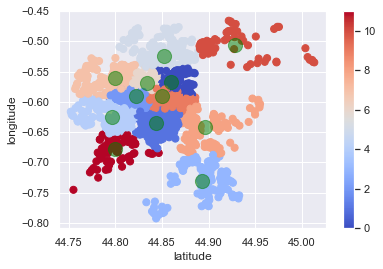

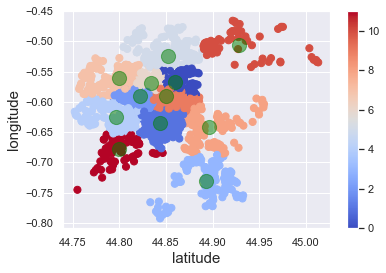

In [517]:

fig, ax = plt.subplots()
parameters = {'axes.labelsize': 15,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)
X.plot.scatter(x = 'latitude', y = 'longitude', c=labels, s=50, cmap='coolwarm', ax=ax)
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5)
plt.show()




fig, ax = plt.subplots()
parameters = {'axes.labelsize': 15,
          'axes.titlesize': 15}
plt.rcParams.update(parameters)
X_FrenchEnglish.plot.scatter(x = 'latitude', y = 'longitude', c=labels_FrenchEnglish, s=50, cmap='coolwarm', ax=ax)
plt.scatter(centers[:, 0], centers[:, 1], c='green', s=200, alpha=0.5)
plt.show()

In [518]:
X = X[['id','cluster_location']]
X_FrenchEnglish = X_FrenchEnglish[['id','cluster_location']]
print(X.head(5))
print(X_FrenchEnglish.head(5))


english_clean = english_clean.merge(X, left_on='id', right_on='id')
englishFrench_clean = englishFrench_clean.merge(X_FrenchEnglish, left_on='id', right_on='id')
print(english_clean.head(5))


english_clean.drop(['longitude','latitude'], axis = 1, inplace = True)
englishFrench_clean.drop(['longitude','latitude'], axis = 1, inplace = True)

english_clean.head(5)

english_clean.to_pickle('english_clean.pickle')
englishFrench_clean.to_pickle('englishFrench_clean.pickle')
english_clean.to_csv('english_with_location.csv')
englishFrench_clean.to_csv('englishFrench_with_location.csv')

       id  cluster_location
0   28925                 4
1  218103                10
2  222887                 0
3  317273                 4
4  317658                 0
       id  cluster_location
0   28925                 9
1  218103                 7
2  222887                 6
3  317273                 9
4  317658                 6
       id host_is_superhost host_identity_verified  \
0   28925                 f                      f   
1  218103                 t                      t   
2  222887                 t                      t   
3  317273                 t                      t   
4  317658                 t                      t   

                   neighbourhood_cleansed  latitude  longitude  \
0                 Centre ville (Bordeaux)  44.85024   -0.59209   
1                                   Bgles  44.81545   -0.54808   
2                            Bordeaux Sud  44.83611   -0.56640   
3  Chartrons - Grand Parc - Jardin Public  44.84782   -0.58105   
4        

In [519]:
english_clean.to_excel('english_with_location.xls')
englishFrench_clean.to_excel('englishFrench_with_location.xls')

In [524]:
# Preprocessing the Data
def preprocess(df):
    
    temp_df = df.copy()
    
    # Calculate the bedroom share per person. Higher the share, more the comfort.
    temp_df = temp_df.assign(
        bedroom_share = temp_df.bedrooms/temp_df.accommodates,
    )


    
    #df = temp_df.drop("bedrooms", axis=1)
    
    df = temp_df
    
    print("Completed")
    
    return df


english_clean=preprocess(english_clean)
englishFrench_clean=preprocess(englishFrench_clean)
english_clean.head()

Completed
Completed


,id,host_is_superhost,host_identity_verified,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,price,minimum_nights,number_of_reviews,reviews_per_month,sentiment pattern,sentiment_bert,cluster_location,bedroom_share
0,28925,f,f,Centre ville (Bordeaux),Entire residential home,Entire home/apt,12,6.0,14.0,255.0,2,2,0.04,0.380833,1.000000,4,0.500000
1,218103,t,t,Bgles,Entire rental unit,Entire home/apt,4,1.0,1.0,110.0,2,58,0.47,0.341727,0.863636,10,0.250000
2,222887,t,t,Bordeaux Sud,Entire rental unit,Entire home/apt,4,2.0,3.0,189.0,3,46,0.38,0.445263,0.797297,0,0.500000
3,317273,t,t,Chartrons - Grand Parc - Jardin Public,Entire rental unit,Entire home/apt,3,1.0,2.0,134.0,3,29,0.32,0.425181,0.880952,4,0.333333
4,317658,t,t,Centre ville (Bordeaux),Entire rental unit,Entire home/apt,6,2.0,4.0,189.0,3,69,0.58,0.445980,0.864407,0,0.333333


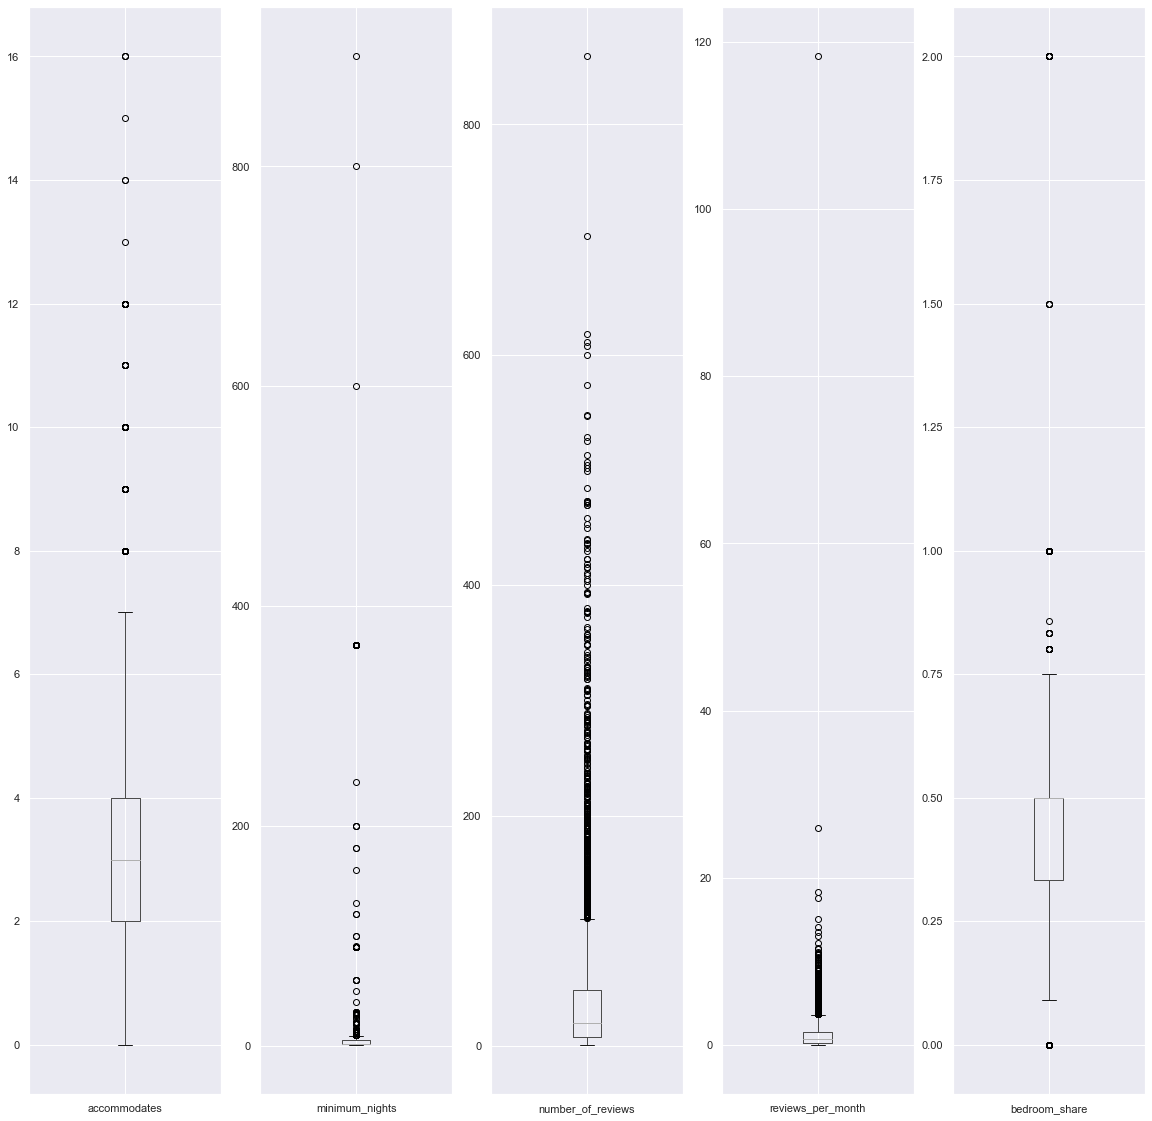

In [525]:

fig, axes = plt.subplots(nrows=1, ncols=5,figsize=(20,20)) # create 2x2 array of subplots

english_clean.boxplot(column='accommodates', ax=axes[0]) # add boxplot to 1st subplot
english_clean.boxplot(column='minimum_nights',ax=axes[1]) # add boxplot to 4th subplot
english_clean.boxplot(column='number_of_reviews',  ax=axes[2]) # add boxplot to 5th subplot
english_clean.boxplot(column='reviews_per_month', ax=axes[3]) # add boxplot to 6th subplot
english_clean.boxplot(column='bedroom_share',ax=axes[4]) # add boxplot to 7th subplot
# etc.
plt.show()

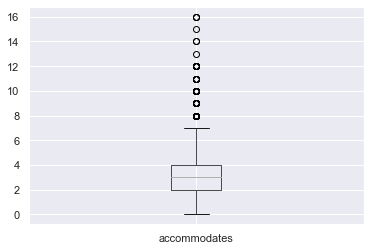

0

In [74]:

english_clean.boxplot(column='accommodates')
plt.show()

min(english_clean['accommodates'])

(5390, 17)


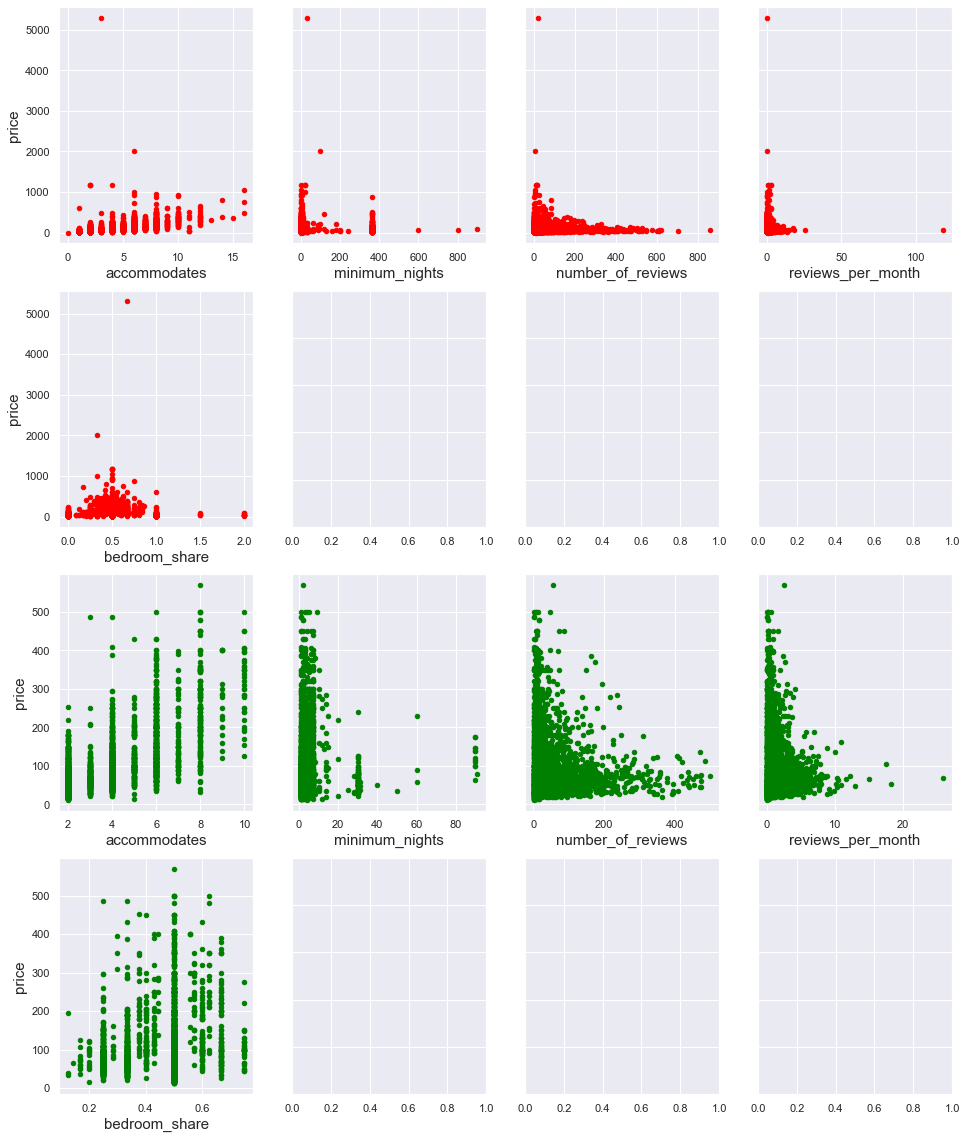

In [526]:
#English Data remove by quantile value+ somebusiness sense
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(16, 20))
axes = np.ravel(axes)
col_name = ['accommodates','minimum_nights','number_of_reviews','reviews_per_month','bedroom_share']
for i, c in zip(range(9), col_name):
    english_clean.plot.scatter(ax=axes[i], x=c, y='price', sharey=True, colorbar=False, c='red')

    # remove outliers
print(english_clean.shape)
cols = ['bedroom_share']
Q1 = english_clean[cols].quantile(0.25)
Q3 = english_clean[cols].quantile(0.75)
IQR = Q3 - Q1

english_clean = english_clean[~((english_clean[cols] < (Q1 - 1.5 * IQR)) |(english_clean[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

english_clean = english_clean[english_clean['accommodates'] < 11]
english_clean = english_clean[english_clean['minimum_nights'] < 100]
english_clean = english_clean[english_clean['number_of_reviews'] < 500]
english_clean = english_clean[english_clean['reviews_per_month'] < 30]
english_clean = english_clean[english_clean['price'] < 600]
english_clean = english_clean[english_clean['price'] > 0]

for i, c in zip(range(8,16), col_name):
    english_clean.plot.scatter(ax=axes[i], x=c, y='price', sharey=True, colorbar=False, c='green')

(5390, 17)


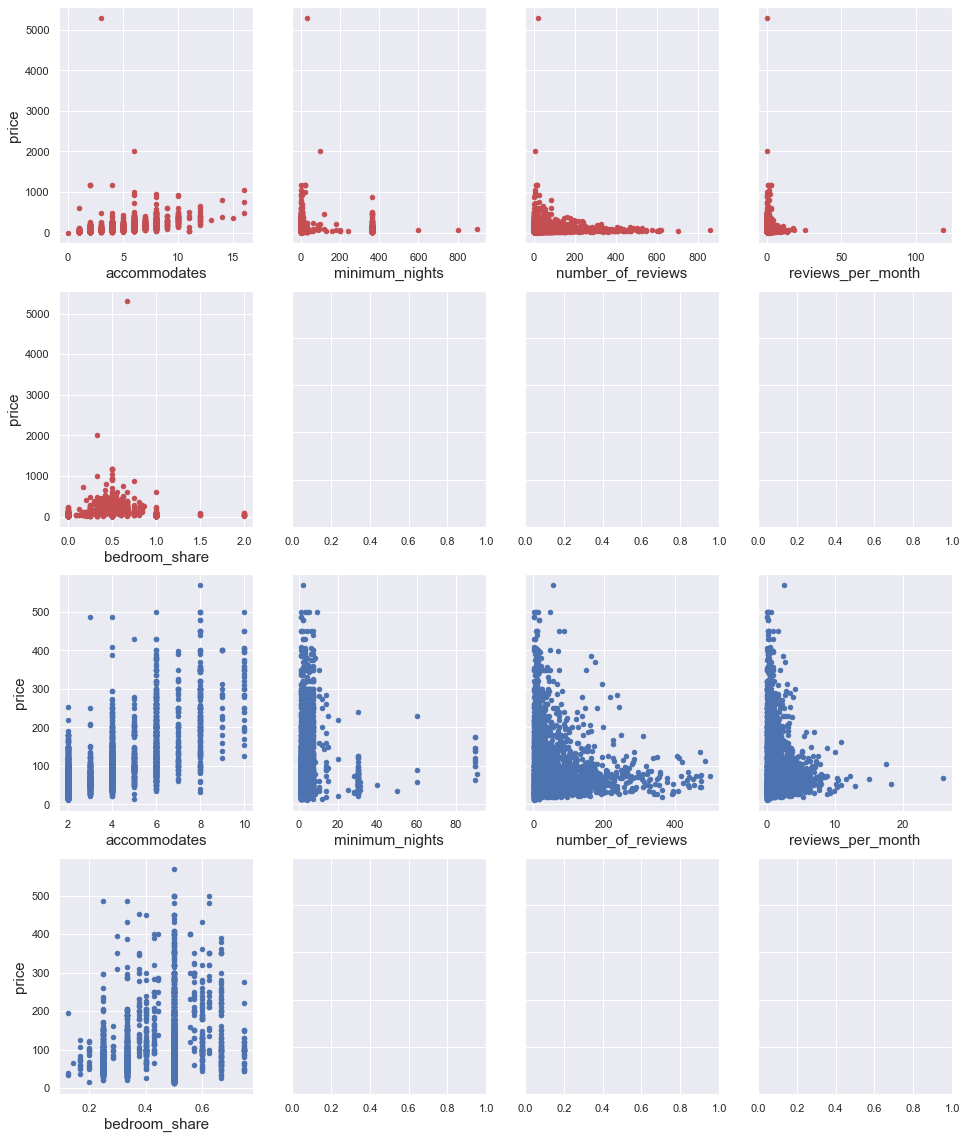

In [527]:
#EnglishFrench Data remove by quantile value+ somebusiness sense
fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(16, 20))
axes = np.ravel(axes)
col_name = ['accommodates','minimum_nights','number_of_reviews','reviews_per_month','bedroom_share']
for i, c in zip(range(9), col_name):
    englishFrench_clean.plot.scatter(ax=axes[i], x=c, y='price', sharey=True, colorbar=False, c='r')

    # remove outliers
print(englishFrench_clean.shape)
cols = ['bedroom_share']
Q1 = englishFrench_clean[cols].quantile(0.25)
Q3 = englishFrench_clean[cols].quantile(0.75)
IQR = Q3 - Q1

englishFrench_clean = englishFrench_clean[~((englishFrench_clean[cols] < (Q1 - 1.5 * IQR)) |(englishFrench_clean[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

englishFrench_clean = englishFrench_clean[englishFrench_clean['accommodates'] < 11]
englishFrench_clean = englishFrench_clean[englishFrench_clean['minimum_nights'] < 100]
englishFrench_clean = englishFrench_clean[englishFrench_clean['number_of_reviews'] < 500]
englishFrench_clean = englishFrench_clean[englishFrench_clean['reviews_per_month'] < 30]
englishFrench_clean = englishFrench_clean[englishFrench_clean['price'] < 600]
englishFrench_clean = englishFrench_clean[englishFrench_clean['price'] > 0]

for i, c in zip(range(8,16), col_name):
    englishFrench_clean.plot.scatter(ax=axes[i], x=c, y='price', sharey=True, colorbar=False, c='b')

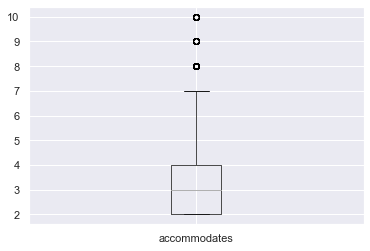

2

In [51]:
englishFrench_clean .boxplot(column='accommodates')
plt.show()

min(englishFrench_clean ['accommodates'])

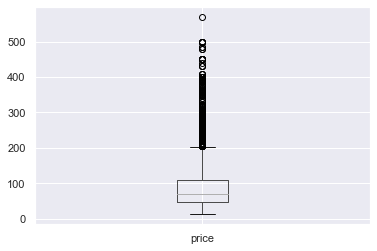

12.0
3825


In [528]:
english_clean .boxplot(column='price')
plt.show()

print(min(english_clean ['price']))
print(len(english_clean ['price']))

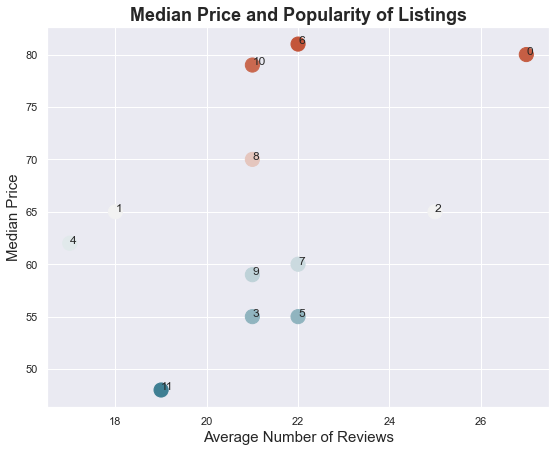

In [53]:
def plot_price_vs_popularity(df, top_k):
    x = df.groupby('cluster_location')[
        'number_of_reviews'].median().sort_index()[:top_k]
    y = df.groupby('cluster_location')[
        'price'].median().sort_index()[:top_k]
    n = (x.reset_index()).cluster_location.tolist()[:top_k]
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.scatter(x, y, c=y, cmap=sns.diverging_palette(
        220, 20, sep=20, as_cmap=True), s=200)

    for i, txt in enumerate(n):
        ax.annotate(txt, (x[i], y[i]), fontsize=12)

    plt.xlabel('Average Number of Reviews')
    plt.ylabel('Median Price')
    plt.title('Median Price and Popularity of Listings',
              fontsize=18, fontweight='bold')
plot_price_vs_popularity(english_clean, 13)
# visualize distribution of price (target)plot_price_vs_popularity(englishFrench_clean, 13)

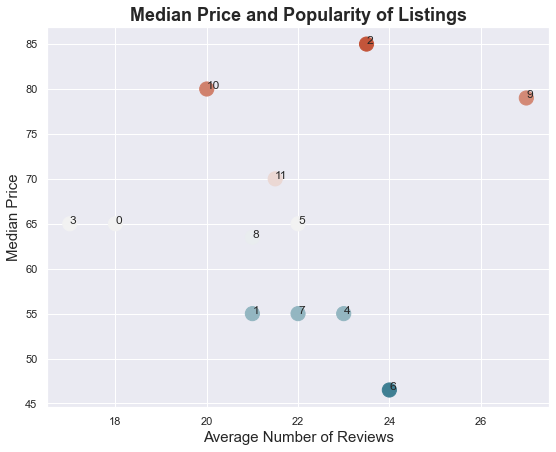

In [54]:
plot_price_vs_popularity(englishFrench_clean, 13)

english data Mean 93.92888888888889
english data Median 71.0
english and French data Mean 93.92888888888889
english and French data Median 71.0


C:\Users\amand\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amand\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'English French ReviewPrice Distribution Plot')

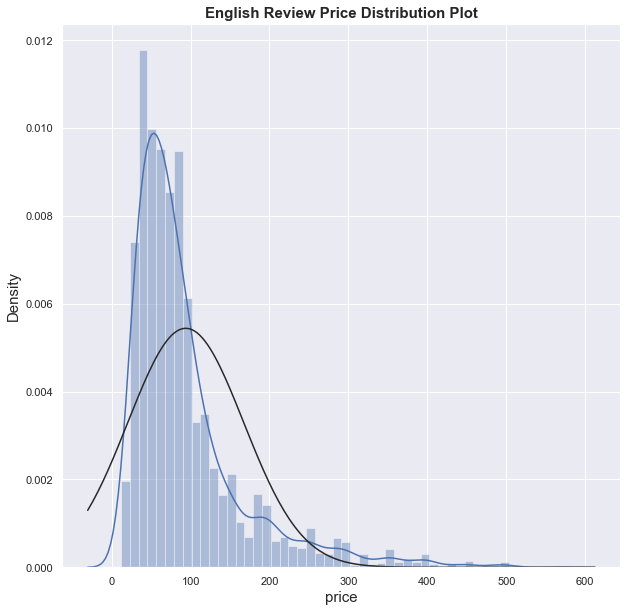

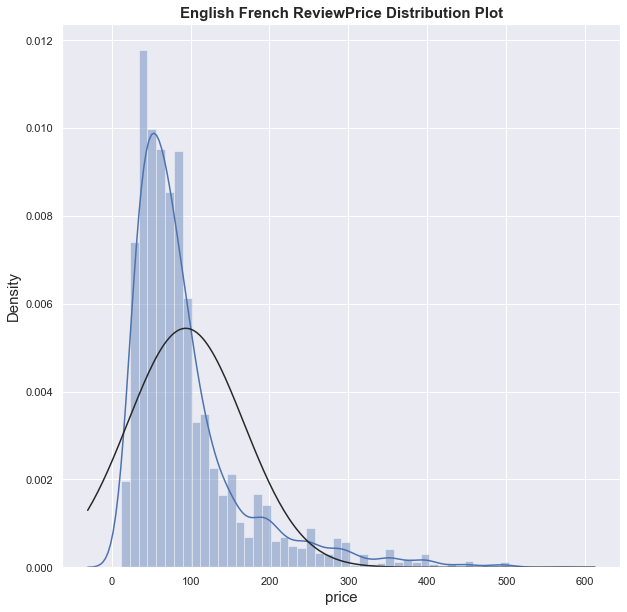

In [55]:
print("english data Mean", english_clean['price'].mean())
print("english data Median",english_clean['price'].median())
print("english and French data Mean",englishFrench_clean['price'].mean())
print("english and French data Median", englishFrench_clean['price'].median())

plt.figure(figsize=(10,10))
sns.distplot(english_clean['price'], fit=norm)
plt.title("English Review Price Distribution Plot",size=15, weight='bold')
plt.figure(figsize=(10,10))
sns.distplot(englishFrench_clean['price'], fit=norm)
plt.title("English French ReviewPrice Distribution Plot",size=15, weight='bold')


In [529]:
# log transform the response 'price'
english_clean['price_log'] = english_clean['price'].apply(lambda x: math.log(x))
englishFrench_clean['price_log'] = englishFrench_clean['price'].apply(lambda x: math.log(x))

# Square-Root transform the response 'price'
english_clean['price_Square-Root'] = english_clean['price']**(1/2)
englishFrench_clean['price_Square-Root'] = englishFrench_clean['price']**(1/2)

# Reciprocal Transformation the response 'price'

english_clean['price_reciprocal'] = 1/english_clean['price']
englishFrench_clean['price_reciprocal'] = 1/englishFrench_clean['price']



from scipy.stats import boxcox
# Box-Cox Transformation the response 'price'

english_clean['bcx_price'], fitted_lambda = boxcox(english_clean['price'])
englishFrench_clean['bcx_price'] , fitted_lambda1 = boxcox(englishFrench_clean['price'])

C:\Users\amand\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amand\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amand\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

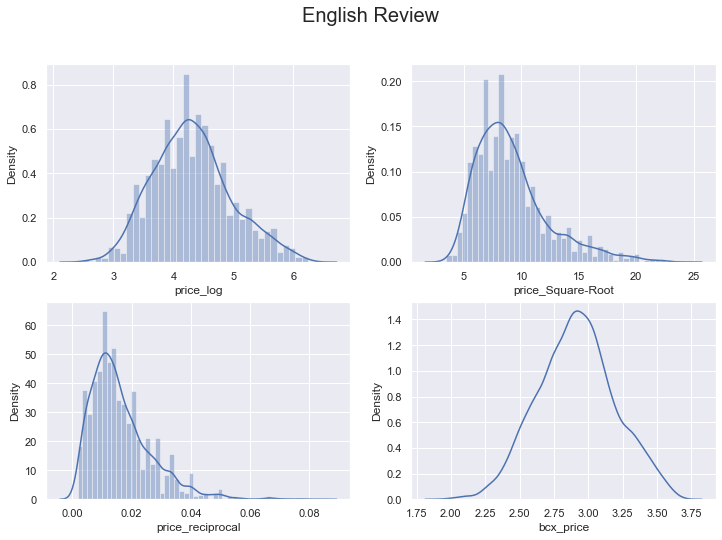

In [530]:
from pylab import *

sns.set(rc={"figure.figsize": (12, 8)})

subplot(2,2,1)
ax = sns.distplot(english_clean['price_log'])

subplot(2,2,2)
ax = sns.distplot(english_clean['price_Square-Root'])

subplot(2,2,3)
ax = sns.distplot(english_clean['price_reciprocal'])

subplot(2,2,4)
ax = sns.kdeplot(english_clean['bcx_price'])


plt.suptitle('English Review',fontsize=20)
plt.show()

C:\Users\amand\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\amand\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


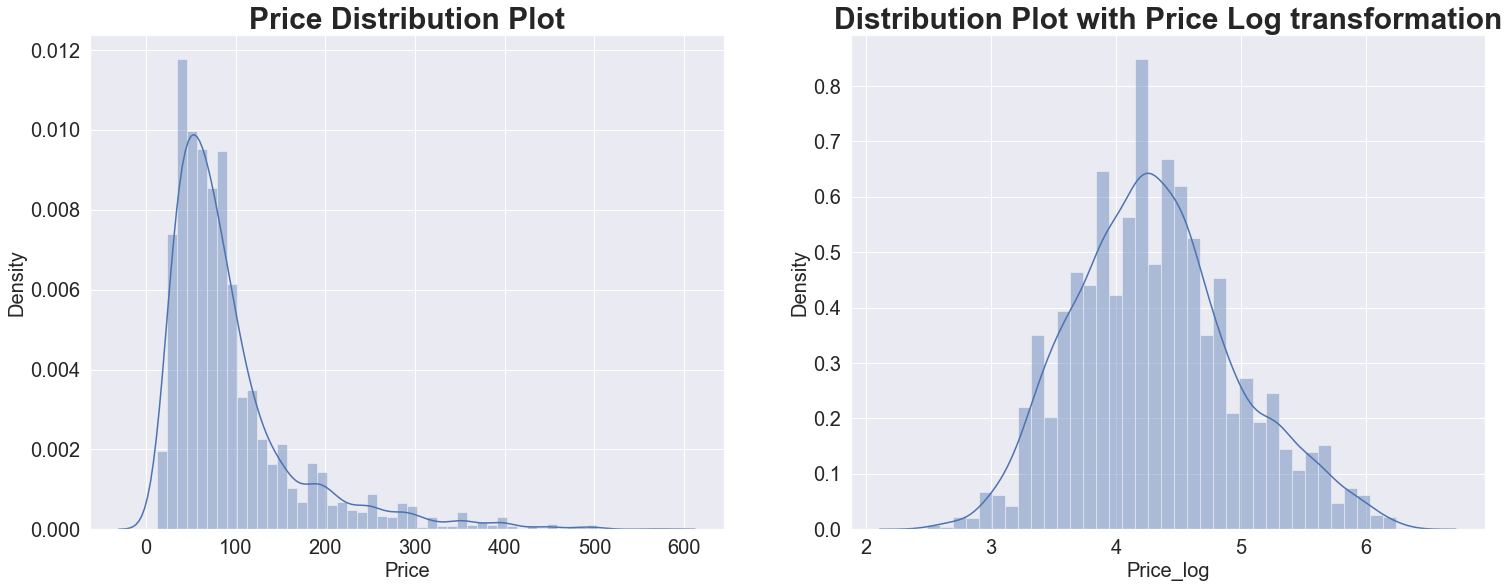

In [531]:
#distribution of price before and after log transformation

sns.set(rc={"figure.figsize": (25, 20)})

subplot(2,2,1)
ax = sns.distplot(english_clean['price'])
plt.title("Price Distribution Plot",size=30, weight='bold')
ax.set_xlabel("Price",fontsize=20)
ax.set_ylabel("Density",fontsize=20)
ax.tick_params(labelsize=20)


subplot(2,2,2)
ax = sns.distplot(english_clean['price_log'])
plt.title("Distribution Plot with Price Log transformation",size=30, weight='bold')
ax.set_xlabel("Price_log",fontsize=20)
ax.set_ylabel("Density",fontsize=20)
ax.tick_params(labelsize=20)
plt.show()

In [532]:
#use price_log as Y

english_clean.drop(['price_reciprocal','price_Square-Root','bcx_price'], axis = 1, inplace = True)

englishFrench_clean.drop(['price_reciprocal','price_Square-Root','bcx_price'], axis = 1, inplace = True)
DataEnglish = english_clean.copy()
DataFrenchEnglish = englishFrench_clean.copy()

In [533]:
DataEnglish = english_clean.copy()
DataFrenchEnglish = englishFrench_clean.copy()

In [534]:
# drop unneccessary column 
DataEnglish.drop(['neighbourhood_cleansed'], axis = 1, inplace = True)
DataFrenchEnglish.drop(['neighbourhood_cleansed'], axis = 1, inplace = True)

# after K mean cluster convert the number into string
DataEnglish['cluster_location'] = DataEnglish['cluster_location'].apply(str)
DataFrenchEnglish['cluster_location'] = DataFrenchEnglish['cluster_location'].apply(str)

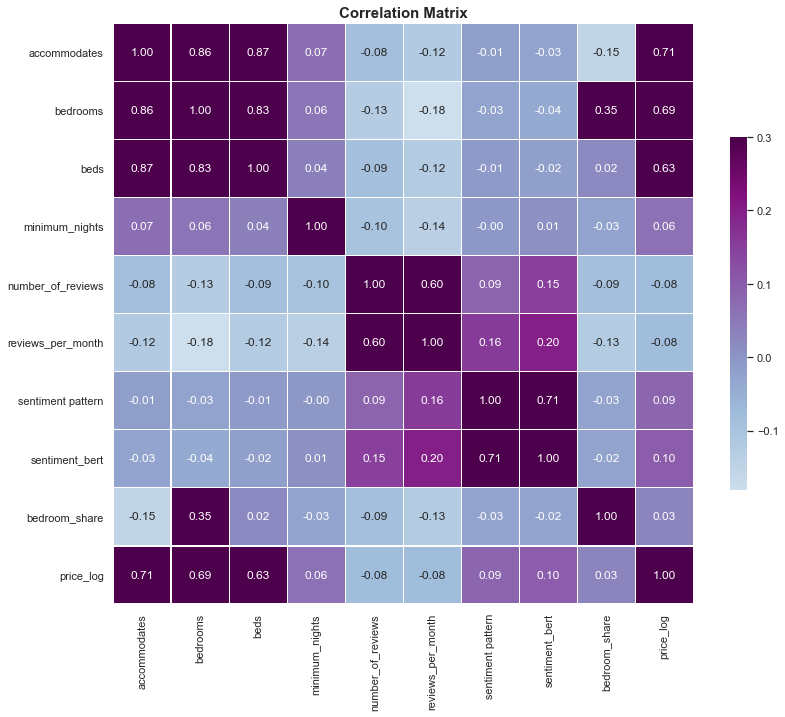

In [549]:
#sentiment score from English review dataset  (after remove beds and bedrooms)
correlation_eng = DataEnglish.copy()

correlation_eng.drop(["id"], axis = 1, inplace = True)
correlation_eng.drop(["price"], axis = 1, inplace = True)
#correlation_eng.drop(["bedrooms"], axis = 1, inplace = True)
plt.figure(figsize=(13,13))
palette = sns.diverging_palette(220, 220, n=256)
corr=correlation_eng.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap="BuPu", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(10, 0))
plt.title("Correlation Matrix",size=15, weight='bold')
plt.savefig('Correlation.png')

Text(0.5, 1.0, 'Correlation Matrix')

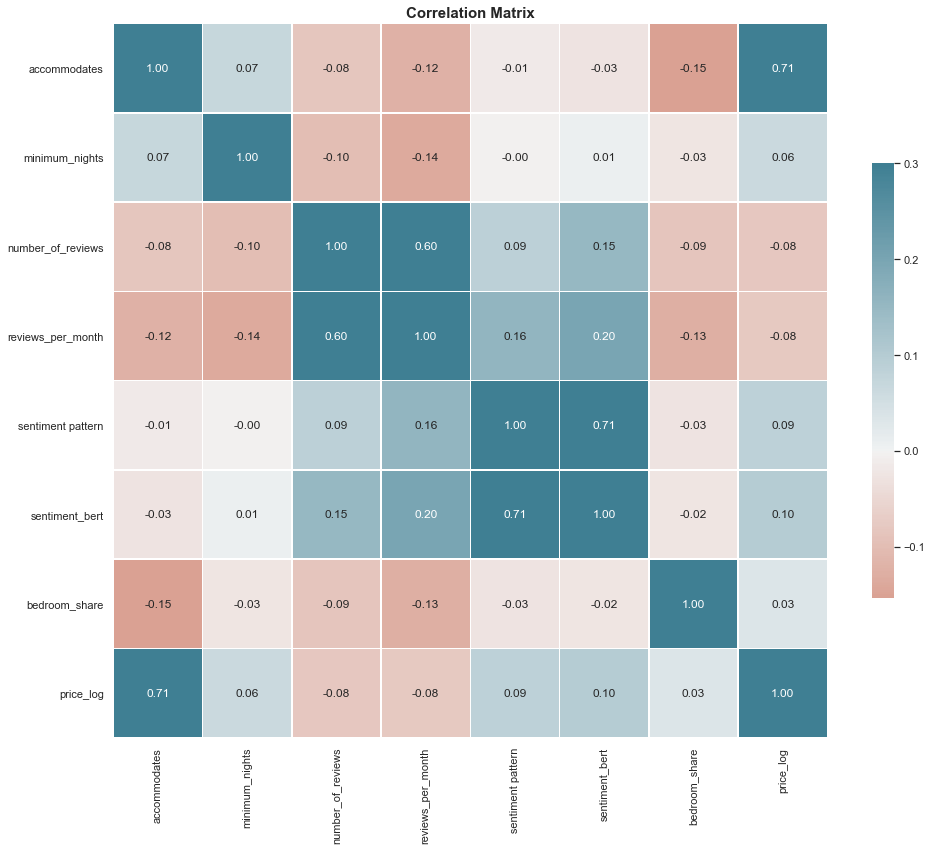

In [74]:
#sentiment score from English review dataset  (after remove beds and bedrooms)
correlation_eng = DataEnglish.copy()

correlation_eng.drop(["id"], axis = 1, inplace = True)
correlation_eng.drop(["price"], axis = 1, inplace = True)
#correlation_eng.drop(["bedrooms"], axis = 1, inplace = True)
plt.figure(figsize=(16,16))
palette = sns.diverging_palette(20, 220, n=256)
corr=correlation_eng.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(8, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

Text(0.5, 1.0, 'Correlation Matrix')

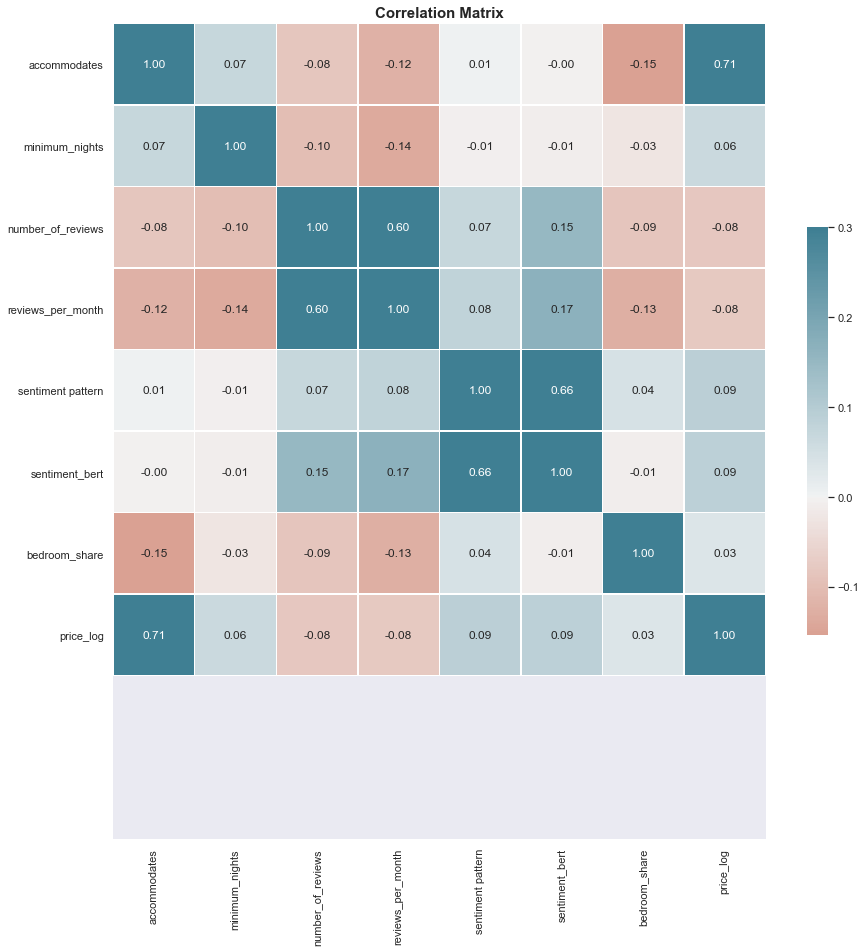

In [65]:
#sentiment score from French +English review dataset after removing beds and bedrooms
correlation_EnglishFrench = DataFrenchEnglish.copy()

correlation_EnglishFrench.drop(["id"], axis = 1, inplace = True)
correlation_EnglishFrench.drop(["price"], axis = 1, inplace = True)
correlation_EnglishFrench.drop(["bedrooms"], axis = 1, inplace = True)
correlation_EnglishFrench.drop(["beds"], axis = 1, inplace = True)
plt.figure(figsize=(15,15))
palette = sns.diverging_palette(20, 220, n=256)
corr=correlation_EnglishFrench.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt=".2f", cmap=palette, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set(ylim=(10, 0))
plt.title("Correlation Matrix",size=15, weight='bold')

In [75]:
#monolingual(english) dataset
results = pd.DataFrame(correlation_eng.drop('price_log', axis=1).corrwith(correlation_eng.price_log).agg('square'), 
                       columns=['weight'])

ranks = np.zeros(len(results), dtype=np.int)
for i, j in enumerate(np.argsort(results.weight)[::-1]):
    ranks[j] = i
results['rank'] = ranks

results.sort_values('rank').loc[:, ['rank', 'weight']].iloc[0:10]

,rank,weight
accommodates,0,0.500206
sentiment_bert,1,0.009959
sentiment pattern,2,0.007313
number_of_reviews,3,0.006339
reviews_per_month,4,0.006250
minimum_nights,5,0.004053
bedroom_share,6,0.001055


In [77]:


#Dummy variables and splitting train data
#  x  y variables, among all x, sentment score is  from monolingual English review analysis 
#double x , double y among all x, sentment score is  from multilingual English French review analysis  
#splitting
from sklearn.preprocessing import scale
y = DataEnglish[['price_log']]
yy=DataFrenchEnglish[['price_log']]
x = DataEnglish.copy()
xx = DataFrenchEnglish.copy()
x.drop(['id','price','property_type','price_log','bedrooms'，'bed'],axis=1, inplace = True)
xx.drop(['id','price','property_type','price_log','bedrooms'，'bed'],axis=1, inplace = True)



# creating dummy variables for categorical variables
create_categorical_dum = x.select_dtypes(include=['object'])
create_categorical_dumF = xx.select_dtypes(include=['object'])
create_categorical_dum.head()

object_dum = pd.get_dummies(create_categorical_dum)
object_dumF = pd.get_dummies(create_categorical_dumF)
object_dum.head()

x = x.drop(list(create_categorical_dum.columns), axis=1)
x = pd.concat([x,object_dum], axis=1)
xx = xx.drop(list(create_categorical_dumF.columns), axis=1)
xx = pd.concat([xx,object_dumF], axis=1)
object_dum.head()

,host_is_superhost_f,host_is_superhost_t,host_identity_verified_f,host_identity_verified_t,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,cluster_location_0,cluster_location_1,cluster_location_10,cluster_location_11,cluster_location_2,cluster_location_3,cluster_location_4,cluster_location_5,cluster_location_6,cluster_location_7,cluster_location_8,cluster_location_9
1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [78]:
print(sum(y))
print(sum(yy))
print(len(yy))

price_log    16506.440275
dtype: float64
price_log    16506.440275
dtype: float64
3825


In [79]:
#check correlation between Y and categorial feature
results = pd.DataFrame(x.corrwith(correlation_eng.price_log).agg('square'), 
                       columns=['weight'])


ranks = np.zeros(len(results), dtype=np.uint8)
for i, j in enumerate(np.argsort(results.weight)[::-1]):
    ranks[j] = i
results['rank'] = ranks

results.sort_values('rank').loc[:, ['rank', 'weight']].iloc[0:10]

,rank,weight
accommodates,0,0.500206
room_type_Entire home/apt,1,0.316582
room_type_Private room,2,0.309978
sentiment_bert,3,0.009959
host_identity_verified_t,4,0.008077
host_identity_verified_f,5,0.008077
cluster_location_0,6,0.007473
cluster_location_3,7,0.007376
sentiment pattern,8,0.007313
cluster_location_7,9,0.007159


In [80]:
#  x  y variables, among all x, sentment score is  from monolingual English review analysis 
#double x , double y among all x, sentment score is  from multilingual English French review analysis  


x_EnglishPattern = x.copy().drop('sentiment_bert', axis=1)
x_EnglishBert = x.copy().drop('sentiment pattern', axis=1)

xx_multilingual_Pattern = xx.copy().drop('sentiment_bert', axis=1)
xx_multilingual_Bert = xx.copy().drop('sentiment pattern', axis=1)

x_EnglishBert.to_pickle('x_EnglishBert.pickle')
x_EnglishPattern.to_pickle('x_EnglishPattern.pickle')
y.to_pickle('y_data.pickle')
x_EnglishBert.to_csv('x_EnglishBert.csv')
x_EnglishPattern.to_csv('x_EnglishPattern.csv')
y.to_csv('y_data.csv')


xx_multilingual_Bert.to_pickle('xx_multilingual_Bert.pickle')
xx_multilingual_Pattern.to_pickle('xx_multilingual_Pattern.pickle')
yy.to_pickle('yy_data.pickle')
xx_multilingual_Bert.to_csv('xx_multilingual_Bert.csv')
xx_multilingual_Pattern.to_csv('xx_multilingual_Pattern.csv')
yy.to_csv('yy_data.csv')

In [81]:
#Models

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
import sklearn as sklearn
import multiprocessing

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import RandomTreesEmbedding
from sklearn.neural_network import MLPRegressor
# from sklearn.linear_model import ElasticNet
from sklearn.gaussian_process import GaussianProcessRegressor


# from sklearn.preprocessing import Imputer
from sklearn import metrics
# import statsmodels.api as sm
#!pip install keras

#from keras.models import Sequential
#from keras.layers import Dense

In [82]:
#English data + pattern

x_train, x_test, y_train, y_test = train_test_split(x_EnglishPattern, y, test_size=0.3, random_state=42)

#English data +bert
X_train, X_test, Y_train, Y_test = train_test_split(x_EnglishBert, y, test_size=0.3, random_state=42)

#EnglishFrench data + pattern

xx_train, xx_test, yy_train, yy_test = train_test_split(xx_multilingual_Pattern, yy, test_size=0.3, random_state=42)

#EnglishFrench data +bert
XX_train, XX_test, YY_train, YY_test = train_test_split(xx_multilingual_Bert, yy, test_size=0.3, random_state=42)


In [83]:
print(sum(y_test))
print(sum(Y_test))
print(sum(yy_test))
print(sum(YY_test))

price_log    4978.204342
dtype: float64
price_log    4978.204342
dtype: float64
price_log    4978.204342
dtype: float64
price_log    4978.204342
dtype: float64


C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


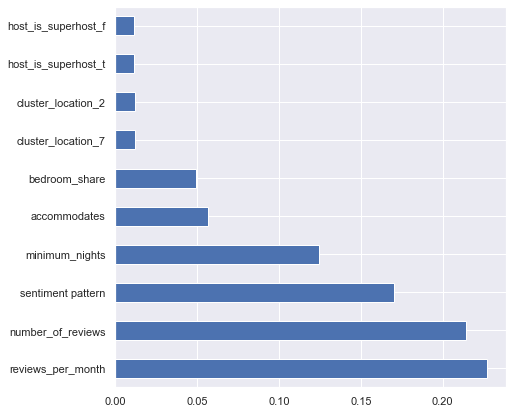

C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


ExtraTreesClassifier(n_estimators=50)

In [84]:
lab_enc = preprocessing.LabelEncoder()

#for english data Pattern,Bert
feature_model = ExtraTreesClassifier(n_estimators=50)
feature_model.fit(x_train,lab_enc.fit_transform(y_train))
feature_model.fit(X_train,lab_enc.fit_transform(Y_train))
#visual for multilingual Pattern sentiment score
plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=x_EnglishPattern.iloc[:,:].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

#for multilingual englishFrench data Pattern,Bert
feature_model_multilingual = ExtraTreesClassifier(n_estimators=50)
feature_model_multilingual.fit(xx_train,lab_enc.fit_transform(yy_train))
feature_model_multilingual.fit(XX_train,lab_enc.fit_transform(YY_train))

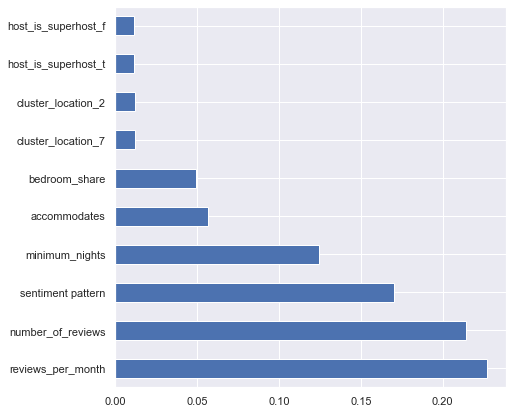

In [85]:
#do the same visual for multilingual Pattern sentiment score
plt.figure(figsize=(7,7))
feat_importances = pd.Series(feature_model.feature_importances_, index=xx_multilingual_Pattern.iloc[:,:].columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [86]:
# scale data
from sklearn.preprocessing import StandardScaler
# scale english data Pattern,Bert

scaler = StandardScaler()
scaler.fit(x_EnglishPattern)
scaler.fit(x_EnglishBert)
x_train = scaler.transform(x_train)
X_train = scaler.transform(X_train)
x_test  = scaler.transform(x_test)
X_test  = scaler.transform(X_test)

# scale englishFrench data Pattern,Bert

scaler = StandardScaler()
scaler.fit(xx_multilingual_Pattern)
scaler.fit(xx_multilingual_Bert)
xx_train = scaler.transform(xx_train)
XX_train = scaler.transform(XX_train)
xx_test  = scaler.transform(xx_test)
XX_test  = scaler.transform(XX_test)

#Polynomial transformation english data Pattern,Bert
polynomial_features= PolynomialFeatures(degree=4)
polynomial_features.fit_transform(x_train)
polynomial_features.fit_transform(x_test)

polynomial_features.fit_transform(X_train)
polynomial_features.fit_transform(X_test)

#Polynomial transformation englishFrench data Pattern,Bert
polynomial_features.fit_transform(xx_train)
polynomial_features.fit_transform(xx_test)

polynomial_features.fit_transform(XX_train)
polynomial_features.fit_transform(XX_test)

array([[ 1.00000000e+00, -8.74367604e-01, -3.58836040e-01, ...,
         4.58120660e-02, -5.11111773e-01,  5.70232403e+00],
       [ 1.00000000e+00,  1.29138023e+00,  7.67090795e-02, ...,
         8.03392894e-03,  3.75351406e-02,  1.75367095e-01],
       [ 1.00000000e+00, -8.74367604e-01, -3.58836040e-01, ...,
         8.03392894e-03,  3.75351406e-02,  1.75367095e-01],
       ...,
       [ 1.00000000e+00,  2.08506311e-01,  1.25623359e+01, ...,
         4.58120660e-02, -5.11111773e-01,  5.70232403e+00],
       [ 1.00000000e+00,  2.08506311e-01,  7.67090795e-02, ...,
         4.58120660e-02, -5.11111773e-01,  5.70232403e+00],
       [ 1.00000000e+00, -8.74367604e-01,  7.67090795e-02, ...,
         4.58120660e-02, -5.11111773e-01,  5.70232403e+00]])

In [87]:
#different code for gridsearch


#GridSearch

from sklearn.model_selection import KFold
from joblib import load, dump


#
def getkey(model):
  return pd.Series(model.get_params().keys())



def gridsearch(models,paramgrid, input_x, input_y, folds):
    ## Defining parameters
    model= models
    kf = KFold(n_splits = folds, random_state = 0, shuffle=True)

    scores = {"r2":"r2",
              "mae":"neg_mean_absolute_error",
              "mse":"neg_mean_squared_error",
              "rmse":"neg_root_mean_squared_error",
              "meae":"neg_median_absolute_error"}


    # prepare a range of alpha values to test
    #alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
    #normalizes= ([True,False])

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search = GridSearchCV(estimator=model,  
                         param_grid=paramgrid,
                         scoring=scores,
                         cv=kf,
                         refit = "r2",
                         n_jobs=-1,
                         verbose = 2)
    
    grid_search.fit(input_x, input_y)
    #we can save the gs, maybe handy
    #dump(grid_search)

    best_mod = models.set_params(**grid_search.best_params_).fit(input_x, input_y)

    ## Lastly, finding the best parameters.

    return grid_search, best_mod



def extractgsscores(gs):
    results = pd.DataFrame(gs.cv_results_)
    for key in list(results.keys()):
      if "split" in key:
        del results[key]
      if "time" in key:
        del results[key]
    return pd.DataFrame(results)

#evaluate(gs,"nameofsavefile")
def evaluate(gridsearchmodel, name, a, b, c, d):

    y_pred = gridsearchmodel.best_estimator_.predict(a)


    
    if any(y_pred <0):
        print(y_pred [y_pred <0])

    print(gridsearchmodel.best_score_) 
    print(gridsearchmodel.cv_results_['params'][gridsearchmodel.best_index_])
    
    explained_variance=metrics.explained_variance_score(np.exp(b), np.exp(y_pred))
    mean_absolute_error=metrics.mean_absolute_error(np.exp(b), np.exp(y_pred)) 
    mse=metrics.mean_squared_error(np.exp(b), np.exp(y_pred)) 
    mean_squared_log_error=metrics.mean_squared_log_error(np.exp(b), np.exp(y_pred))
    median_absolute_error=metrics.median_absolute_error(np.exp(b), np.exp(y_pred))
    r2=metrics.r2_score(np.exp(b), np.exp(y_pred))
    rmse=round(np.sqrt(mse),4)

    print('explained_variance: ', round(explained_variance,4))       
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE mean_absolute_error: ', round(mean_absolute_error,4))
    print('MSE mean_squared_error: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

    print(' --------- (test Data)\n')
    #use np.exp to convert the predicted value back to initial value . That is because we used log transformation on Y for prediciton
    predicted_values_test = gridsearchmodel.best_estimator_.predict(a)
    print("Mean absolute error: ",
          metrics.mean_absolute_error(np.exp(b), np.exp(predicted_values_test)))
    print("Median absolute error: ",
          metrics.median_absolute_error(np.exp(b), np.exp(predicted_values_test)))
    print("Mean squared error: ", metrics.mean_squared_error(
        np.exp(b), np.exp(predicted_values_test))),
    print("R2: ", metrics.r2_score(np.exp(b), np.exp(predicted_values_test)))
    
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(
        np.exp(b), np.exp(predicted_values_test))))
    print(' --------- (Train Data)\n')
    predicted_values = gridsearchmodel.best_estimator_.predict(c)

    print("Mean absolute error: ",
          metrics.mean_absolute_error(np.exp(d), np.exp(predicted_values)))
    print("Median absolute error: ",
          metrics.median_absolute_error(np.exp(d), np.exp(predicted_values)))
    print("Mean squared error: ", 
          metrics.mean_squared_error(np.exp(d), np.exp(predicted_values))),
    print("R2: ", metrics.r2_score(np.exp(d), np.exp(predicted_values)))
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(
        np.exp(d), np.exp(predicted_values))))
    print(gridsearchmodel.best_estimator_)
    



    
    
    
    #make it into csv file
    res = extractgsscores(gridsearchmodel)
    #remove this line if we dont want to save to drive/local
    res.to_csv(str('./') + name +str('.csv'))
    return extractgsscores(gridsearchmodel)

In [88]:
#Linear+Grid+English+Pattern

poly_reg_model = LinearRegression()
from sklearn.linear_model import LinearRegression
poly_reg_model = LinearRegression()
#from sklearn.linear_model import PolynomialRegression

param_grid = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

poly_grid = GridSearchCV(poly_reg_model, param_grid, 
                         cv=5, 
                         scoring='r2', 
                         verbose=3) 

grid_result = poly_grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)


y_pred=grid_result.best_estimator_.predict(x_test)

print("Mean squared error: %.2f" % mean_squared_error(np.exp(y_test), np.exp(y_pred)))
print('Variance score: %.2f' % r2_score(np.exp(y_test), np.exp(y_pred)))
print("R2:", sklearn.metrics.r2_score(np.exp(y_test), np.exp(y_pred)))
evaluate(poly_grid,"Linear_grid",x_test, y_test, x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.663, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.615, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.681, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.626, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, score=0.654, total=   0.0s
[CV] copy_X=True, fit_intercept=True, normalize=False ................
[CV]  copy_X=True, fit_intercept=True, normalize=False, score=0.665, total=   0.0s
[CV] copy_X=True, fit

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] copy_X=False, fit_intercept=True, normalize=False ...............
[CV]  copy_X=False, fit_intercept=True, normalize=False, score=0.654, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=-11.005, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=-10.873, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=-11.482, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=-11.487, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=True ...............
[CV]  copy_X=False, fit_intercept=False, normalize=True, score=-10.480, total=   0.0s
[CV] copy_X=False, fit_intercept=False, normalize=False ...

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.1s finished


,param_copy_X,param_fit_intercept,param_normalize,params,mean_test_score,std_test_score,rank_test_score
0,True,True,True,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.647735,0.024289,3
1,True,True,False,"{'copy_X': True, 'fit_intercept': True, 'norma...",0.648482,0.024553,1
2,True,False,True,"{'copy_X': True, 'fit_intercept': False, 'norm...",-11.065434,0.383280,5
3,True,False,False,"{'copy_X': True, 'fit_intercept': False, 'norm...",-11.065434,0.383280,5
4,False,True,True,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.647735,0.024289,3
5,False,True,False,"{'copy_X': False, 'fit_intercept': True, 'norm...",0.648482,0.024553,1
6,False,False,True,"{'copy_X': False, 'fit_intercept': False, 'nor...",-11.065434,0.383280,5
7,False,False,False,"{'copy_X': False, 'fit_intercept': False, 'nor...",-11.065434,0.383280,5


In [373]:
#linear English pattern grid search method2

from sklearn.feature_selection import RFE
model_Linear = LinearRegression()
getkey(model_Linear)
Linear_par = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
Linear_grid, English_Pattern_Linear_best = gridsearch(model_Linear,Linear_par,x_train,y_train,5)
print(English_Pattern_Linear_best)
evaluate(Linear_grid,"Linear_grid",x_test, y_test, x_train, y_train)

English_Pattern_Linear_best_y_pred = np.exp(English_Pattern_Linear_best.predict(x_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.4s


LinearRegression()
0.6434123770938693
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
explained_variance:  0.6001
mean_squared_log_error:  0.1408
r2:  0.5837
MAE mean_absolute_error:  28.4085
MSE mean_squared_error:  2396.6488
RMSE:  48.9556
 --------- (test Data)

Mean absolute error:  28.408530908960437
Median absolute error:  14.944728024813156
Mean squared error:  2396.648762133486
R2:  0.5837310993970889
RMSE:  48.95557947908988
 --------- (Train Data)

Mean absolute error:  27.494588955688574
Median absolute error:  14.955348602769703
Mean squared error:  2166.476655619735
R2:  0.584281268552703
RMSE:  46.54542572175847
LinearRegression()


[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    2.9s finished


In [356]:
#linear EnglishFrench pattern grid search method2

from sklearn.feature_selection import RFE
model_Linear = LinearRegression()
getkey(model_Linear)
Linear_par = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
Linear_grid, Englishfrench_Pattern_Linear_best = gridsearch(model_Linear,Linear_par,xx_train,yy_train,5)
print(Englishfrench_Pattern_Linear_best)
evaluate(Linear_grid,"Linear_grid", xx_test, yy_test, xx_train, yy_train)


Englishfrench_Pattern_Linear_best_y_pred = np.exp(Englishfrench_Pattern_Linear_best.predict(xx_test))


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


LinearRegression()
0.6410799458278651
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
explained_variance:  0.6022
mean_squared_log_error:  0.1393
r2:  0.5869
MAE mean_absolute_error:  28.0761
MSE mean_squared_error:  2378.365
RMSE:  48.7685
 --------- (test Data)

Mean absolute error:  28.07605570689142
Median absolute error:  15.064325073786948
Mean squared error:  2378.3650230519465
R2:  0.5869067637191349
RMSE:  48.76848391176362
 --------- (Train Data)

Mean absolute error:  27.523414330308917
Median absolute error:  14.525356957840273
Mean squared error:  2201.530197898546
R2:  0.5775549490739857
RMSE:  46.92046672720281
LinearRegression()


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    3.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.8s finished


In [362]:
#linear English bert gridsearch method2
from sklearn.feature_selection import RFE
model_Linear = LinearRegression()
getkey(model_Linear)
Linear_par = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
Linear_grid, English_BertLinear_best = gridsearch(model_Linear,Linear_par,X_train,Y_train,5)
print(English_BertLinear_best)

evaluate(Linear_grid,"Linear_grid",X_test, Y_test, X_train, Y_train)

English_BertLinear_best_y_pred = np.exp(English_BertLinear_best.predict(X_test))




Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s


LinearRegression()
0.6458723178566348
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
explained_variance:  0.5992
mean_squared_log_error:  0.1401
r2:  0.583
MAE mean_absolute_error:  28.27
MSE mean_squared_error:  2400.9653
RMSE:  48.9996
 --------- (test Data)

Mean absolute error:  28.270008046676082
Median absolute error:  14.519741451937785
Mean squared error:  2400.9653063786645
R2:  0.5829813678737493
RMSE:  48.999645982176894
 --------- (Train Data)

Mean absolute error:  27.342620707452323
Median absolute error:  14.582463104585187
Mean squared error:  2161.3946811384167
R2:  0.5852564334496528
RMSE:  46.49080211330427
LinearRegression()


[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    3.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.0s finished


In [247]:
# linear EnglishFrench Bert grid search method2

from sklearn.feature_selection import RFE
model_Linear = LinearRegression()
getkey(model_Linear)
Linear_par = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
Linear_grid, EnglishFrench_BertLinear_best = gridsearch(model_Linear,Linear_par,XX_train,YY_train,5)
print(EnglishFrench_BertLinear_best)

evaluate(Linear_grid,"Linear_grid",XX_test, YY_test, XX_train, YY_train)
EnglishFrench_BertLinear_best_y_pred = np.exp(English_PatternRidge_best.predict(XX_test))




Fitting 5 folds for each of 8 candidates, totalling 40 fits
LinearRegression()
0.6384809039123438
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
explained_variance:  0.5932
mean_squared_log_error:  0.1425
r2:  0.5772
MAE mean_absolute_error:  28.4148
MSE mean_squared_error:  2434.2761
RMSE:  49.3384
 --------- (test Data)

Mean absolute error:  28.41484044385433
Median absolute error:  14.993383045666013
Mean squared error:  2434.276076612961
R2:  0.5771956900044052
RMSE:  49.338383400887395
 --------- (Train Data)

Mean absolute error:  27.652589368433592
Median absolute error:  14.532242334600177
Mean squared error:  2227.9027518008143
R2:  0.5724943985137766
RMSE:  47.20066473897178
LinearRegression()


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  38 out of  40 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.0s finished


In [96]:
# Ridge gridsearch English Pattern
from sklearn.linear_model import Ridge
zero_one=np.array([1.0,0.1,0.01,0.001,0.0001,0])

two_thousand=np.arange(2,1000)

model_Ridge = Ridge()
getkey(model_Ridge)
Ridge_par = {'alpha': np.concatenate((zero_one, two_thousand)), 'copy_X':[True, False], 'normalize':[True,False]}
Ridge_grid, English_PatternRidge_best = gridsearch(model_Ridge,Ridge_par,x_train,y_train,5)
print(English_PatternRidge_best)
evaluate(Ridge_grid,"Ridge_grid",x_test, y_test,x_train, y_train)
#train data
English_PatternRidge_best_y_pred = np.exp(English_PatternRidge_best.predict(x_test))



Fitting 5 folds for each of 4016 candidates, totalling 20080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 3560 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 13928 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 20080 out of 20080 | elapsed:   34.7s finished


Ridge(alpha=26.0)
0.6432952777757052
{'alpha': 26.0, 'copy_X': True, 'normalize': False}
explained_variance:  0.5982
mean_squared_log_error:  0.1411
r2:  0.5809
MAE mean_absolute_error:  28.4221
MSE mean_squared_error:  2412.7917
RMSE:  49.1202
 --------- (test Data)

Mean absolute error:  28.422115505301317
Median absolute error:  14.913019993217642
Mean squared error:  2412.7917057687073
R2:  0.5809272653494388
RMSE:  49.120176157753214
 --------- (Train Data)

Mean absolute error:  27.50640073962136
Median absolute error:  14.82191208608674
Mean squared error:  2172.6080308151163
R2:  0.583104737288616
RMSE:  46.61124360940305
Ridge(alpha=26.0)


In [98]:
# Ridge gridsearch EnglishFrench Pattern
zero_one=np.array([1.0,0.1,0.01,0.001,0.0001,0])

two_thousand=np.arange(2,1000)


model_Ridge = Ridge()
getkey(model_Ridge)
Ridge_par = {'alpha': np.concatenate((zero_one, two_thousand)), 'copy_X':[True, False], 'normalize':[True,False]}
Ridge_grid, EnglishFrench_PatternRidge_best = gridsearch(model_Ridge,Ridge_par,xx_train,yy_train,5)
print(EnglishFrench_PatternRidge_best)
evaluate(Ridge_grid,"Ridge_grid",xx_test, yy_test, xx_train, yy_train)
#train data

#train data
EnglishFrench_PatternRidge_best_y_pred = np.exp(EnglishFrench_PatternRidge_best.predict(xx_test))


Fitting 5 folds for each of 4016 candidates, totalling 20080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 7504 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 11064 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 15280 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 20031 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 20057 out of 20080 | elapsed:   32.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 20080 out of 20080 | elapsed:   32.1s finished


Ridge(alpha=0.01, normalize=True)
0.6411541703754329
{'alpha': 0.01, 'copy_X': True, 'normalize': True}
explained_variance:  0.6007
mean_squared_log_error:  0.1395
r2:  0.5846
MAE mean_absolute_error:  28.099
MSE mean_squared_error:  2391.5043
RMSE:  48.903
 --------- (test Data)

Mean absolute error:  28.098975360868735
Median absolute error:  14.826352201152995
Mean squared error:  2391.504296964788
R2:  0.5846246307704794
RMSE:  48.90300907883673
 --------- (Train Data)

Mean absolute error:  27.53126906904837
Median absolute error:  14.413003296044877
Mean squared error:  2206.9922497613957
R2:  0.5765068522640648
RMSE:  46.97863609941646
Ridge(alpha=0.01, normalize=True)


In [99]:
# Ridge gridsearch English Bert
zero_one=np.array([1.0,0.1,0.01,0.001,0.0001,0])

two_thousand=np.arange(2,1000)

model_Ridge = Ridge()
getkey(model_Ridge)
Ridge_par = {'alpha': np.concatenate((zero_one, two_thousand)), 'copy_X':[True, False], 'normalize':[True,False]}
Ridge_grid, English_Bert_Ridge_best = gridsearch(model_Ridge,Ridge_par,X_train, Y_train,5)
print(English_Bert_Ridge_best)
evaluate(Ridge_grid,"Ridge_grid",X_test, Y_test,X_train, Y_train)
#train data
English_Bert_Ridge_best_y_pred = np.exp(English_Bert_Ridge_best.predict(X_test))





Fitting 5 folds for each of 4016 candidates, totalling 20080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 3560 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 13928 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 20080 out of 20080 | elapsed:   33.5s finished


Ridge(alpha=31.0)
0.6462846143284252
{'alpha': 31.0, 'copy_X': True, 'normalize': False}
explained_variance:  0.5971
mean_squared_log_error:  0.1404
r2:  0.5799
MAE mean_absolute_error:  28.292
MSE mean_squared_error:  2418.5615
RMSE:  49.1789
 --------- (test Data)

Mean absolute error:  28.291984857533123
Median absolute error:  14.565099091082514
Mean squared error:  2418.5614611013216
R2:  0.5799251286379596
RMSE:  49.178872100743845
 --------- (Train Data)

Mean absolute error:  27.350322622022215
Median absolute error:  14.55846787794595
Mean squared error:  2168.03085590025
R2:  0.5839830377052325
RMSE:  46.56211824971293
Ridge(alpha=31.0)


In [100]:
# Ridge gridsearch EnglishFrench Bert
zero_one=np.array([1.0,0.1,0.01,0.001,0.0001,0])

two_thousand=np.arange(2,1000)

model_Ridge = Ridge()
getkey(model_Ridge)
Ridge_par = {'alpha': np.concatenate((zero_one, two_thousand)), 'copy_X':[True, False], 'normalize':[True,False]}
Ridge_grid, EnglishFrench_Bert_Ridge_best = gridsearch(model_Ridge,Ridge_par,XX_train, YY_train,5)
print(EnglishFrench_Bert_Ridge_best)
evaluate(Ridge_grid,"Ridge_grid",XX_test, YY_test,XX_train, YY_train)
#train data
EnglishFrench_Bert_Ridge_best_y_pred = np.exp(EnglishFrench_Bert_Ridge_best.predict(XX_test))





Fitting 5 folds for each of 4016 candidates, totalling 20080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 360 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 3560 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 8088 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done 13928 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 20080 out of 20080 | elapsed:   33.3s finished


Ridge(alpha=32.0)
0.6385202387608796
{'alpha': 32.0, 'copy_X': True, 'normalize': False}
explained_variance:  0.5912
mean_squared_log_error:  0.1428
r2:  0.5742
MAE mean_absolute_error:  28.4431
MSE mean_squared_error:  2451.3702
RMSE:  49.5113
 --------- (test Data)

Mean absolute error:  28.443133708330425
Median absolute error:  14.70854473575299
Mean squared error:  2451.3701844244893
R2:  0.5742266502444204
RMSE:  49.51131370125912
 --------- (Train Data)

Mean absolute error:  27.655724987481193
Median absolute error:  14.36518546680064
Mean squared error:  2233.9235698306065
R2:  0.5713390817338206
RMSE:  47.26440066086321
Ridge(alpha=32.0)


In [102]:


#SVR grid search English Pattern
model_SVR = SVR()
getkey(model_SVR)
SVR_par = {'kernel' : ['rbf'],'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : [0.0001, 0.001, 0.01, 0],'epsilon' : [0.01, 0.05, 0.1, 0.5]}
SVR_grid, English_Pattern_SVR_best = gridsearch(model_SVR,SVR_par,x_train,y_train,5)
print(English_Pattern_SVR_best)
evaluate(SVR_grid,"SVR_grid",x_test, y_test,x_train, y_train)
English_Pattern_SVR_best_y_pred = np.exp(English_Pattern_SVR_best.predict(x_test))




Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   33.5s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   48.6s finished
C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=5, coef0=0.01, gamma=0.01)
0.6582571042362582
{'C': 5, 'coef0': 0.01, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
explained_variance:  0.6264
mean_squared_log_error:  0.1366
r2:  0.6075
MAE mean_absolute_error:  27.2135
MSE mean_squared_error:  2259.6643
RMSE:  47.5359
 --------- (test Data)

Mean absolute error:  27.213486328322723
Median absolute error:  13.755197676864707
Mean squared error:  2259.664331526306
R2:  0.6075236380575331
RMSE:  47.535926745213516
 --------- (Train Data)

Mean absolute error:  25.10110811655791
Median absolute error:  12.355364596996932
Mean squared error:  1933.6771185245736
R2:  0.6289524760599144
RMSE:  43.973595697015426
SVR(C=5, coef0=0.01, gamma=0.01)


In [104]:


#SVR grid search Englishfrench Pattern

model_SVR = SVR()
getkey(model_SVR)
SVR_par = {'kernel' : ['rbf'],'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : [0.0001, 0.001, 0.01, 0],'epsilon' : [0.01, 0.05, 0.1, 0.5]}
SVR_grid, Englishfrench_Pattern_SVR_best = gridsearch(model_SVR,SVR_par,xx_train,yy_train,5)
print(Englishfrench_Pattern_SVR_best)
evaluate(SVR_grid,"SVR_grid",xx_test, yy_test,xx_train, yy_train)

Englishfrench_Pattern_SVR_bestt_y_pred = np.exp(Englishfrench_Pattern_SVR_best.predict(xx_test))




Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   13.8s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   22.6s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   50.3s finished
C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=5, coef0=0.01, epsilon=0.05, gamma=0.01)
0.6562420259416408
{'C': 5, 'coef0': 0.01, 'degree': 3, 'epsilon': 0.05, 'gamma': 0.01, 'kernel': 'rbf'}
explained_variance:  0.6233
mean_squared_log_error:  0.136
r2:  0.6057
MAE mean_absolute_error:  27.1318
MSE mean_squared_error:  2270.2859
RMSE:  47.6475
 --------- (test Data)

Mean absolute error:  27.131799123472806
Median absolute error:  13.94732422460702
Mean squared error:  2270.2859086240746
R2:  0.6056787985921033
RMSE:  47.64751733956424
 --------- (Train Data)

Mean absolute error:  24.785131477128346
Median absolute error:  12.20179490186283
Mean squared error:  1953.498373796733
R2:  0.6251490346168411
RMSE:  44.19839786459157
SVR(C=5, coef0=0.01, epsilon=0.05, gamma=0.01)


In [105]:
#SVR grid search English Bert

model_SVR = SVR()
getkey(model_SVR)
SVR_par = {'kernel' : ['rbf'],'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : [0.0001, 0.001, 0.01, 0],'epsilon' : [0.01, 0.05, 0.1, 0.5]}
SVR_grid, English_Bert_SVR_best = gridsearch(model_SVR,SVR_par,X_train,Y_train,5)
print(English_Bert_SVR_best)
evaluate(SVR_grid,"SVR_grid",X_test, Y_test,X_train, Y_train)
English_Bert_SVR_best_y_pred = np.exp(English_Bert_SVR_best.predict(X_test))




Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   31.0s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   46.1s finished
C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1, coef0=0.01, gamma=0.01)
0.6602980503376976
{'C': 1, 'coef0': 0.01, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
explained_variance:  0.6129
mean_squared_log_error:  0.1374
r2:  0.5913
MAE mean_absolute_error:  27.6277
MSE mean_squared_error:  2353.2599
RMSE:  48.5104
 --------- (test Data)

Mean absolute error:  27.627703053503165
Median absolute error:  13.943925621473893
Mean squared error:  2353.259868853591
R2:  0.5912672253365114
RMSE:  48.51040990193333
 --------- (Train Data)

Mean absolute error:  25.841021607151227
Median absolute error:  13.262326813179982
Mean squared error:  2034.3786696010288
R2:  0.6096291563464584
RMSE:  45.10408706094193
SVR(C=1, coef0=0.01, gamma=0.01)


In [106]:
#SVR grid search EnglishFrench Bert

model_SVR = SVR()
getkey(model_SVR)
SVR_par = {'kernel' : ['rbf'],'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : [0.0001, 0.001, 0.01, 0],'epsilon' : [0.01, 0.05, 0.1, 0.5]}
SVR_grid, EnglishFrench_Bert_SVR_best = gridsearch(model_SVR,SVR_par,XX_train, YY_train,5)
print(EnglishFrench_Bert_SVR_best)
evaluate(SVR_grid,"SVR_grid",XX_test, YY_test,XX_train, YY_train)
EnglishFrench_Bert_SVR_best_y_pred = np.exp(EnglishFrench_Bert_SVR_best.predict(XX_test))


Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:   35.9s
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:   51.6s finished
C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\amand\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(C=1, coef0=0.01, gamma=0.01)
0.6532866884069518
{'C': 1, 'coef0': 0.01, 'degree': 3, 'epsilon': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
explained_variance:  0.6077
mean_squared_log_error:  0.1371
r2:  0.5863
MAE mean_absolute_error:  27.5993
MSE mean_squared_error:  2381.7886
RMSE:  48.8036
 --------- (test Data)

Mean absolute error:  27.599251953891663
Median absolute error:  14.032599347385636
Mean squared error:  2381.7885733412154
R2:  0.5863121344444622
RMSE:  48.803571317488796
 --------- (Train Data)

Mean absolute error:  25.907296254612604
Median absolute error:  12.7333859100535
Mean squared error:  2077.11125984677
R2:  0.601429327300373
RMSE:  45.57533609142965
SVR(C=1, coef0=0.01, gamma=0.01)


In [119]:
conda install -c conda-forge xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [108]:
#XGBoost+Gridsearch

#English Pattern
from xgboost.sklearn import XGBRegressor
model_XGB = XGBRegressor()
getkey(model_XGB)
XGB_par = {'nthread':[1], #when use hyperthread, xgboost may become slower
            'objective':['reg:linear'],
            'learning_rate': [0.005,0.01,0.03, 0.05, 0.07], #so called `eta` value
            'max_depth': [5, 6, 7, 8, 9, 10],
            'min_child_weight': [4,5,6,7],
            'silent': [1],
            'subsample': [0.7,0.8,0.9,1],
            'colsample_bytree': [0.7],
            'n_estimators': [100,120,150,200,500]}
XGB_grid, English_Pattern_XGB_best = gridsearch(model_XGB,XGB_par,x_train,y_train,5)
print(English_Pattern_XGB_best)
evaluate(XGB_grid,"XGB_grid",x_test, y_test,x_train, y_train)
English_Pattern_XGB_best_y_pred = np.exp(English_Pattern_XGB_best.predict(x_test))



Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   22.3s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   44.5s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 12.5min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 14.9min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

[04:49:16] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:16] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[04:49:17] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[04:49:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you

In [110]:

                
#EnglishFrench Pattern
model_XGB = XGBRegressor()
getkey(model_XGB)
XGB_par = {'nthread':[1], #when use hyperthread, xgboost may become slower
            'objective':['reg:linear'],
            'learning_rate': [0.005,0.01,0.03, 0.05, 0.07], #so called `eta` value
            'max_depth': [5, 6, 7, 8, 9, 10],
            'min_child_weight': [4,5,6,7],
            'silent': [1],
            'subsample': [0.7,0.8,0.9,1],
            'colsample_bytree': [0.7],
            'n_estimators': [100,120,150,200,500]}
XGB_grid, EnglishFrench_PatternXGB_best = gridsearch(model_XGB,XGB_par,xx_train,yy_train,5)
print(EnglishFrench_PatternXGB_best)
evaluate(XGB_grid,"XGB_grid",xx_test, yy_test,xx_train, yy_train)
EnglishFrench_PatternXGB_best_y_pred = np.exp(EnglishFrench_PatternXGB_best.predict(xx_test))

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   48.2s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 14.4min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

[05:13:12] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:12] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[05:13:13] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[05:13:13] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you

In [115]:
#XGBoost+Gridsearch

#English Bert

model_XGB = XGBRegressor()
getkey(model_XGB)

XGB_par = {'nthread':[1], #when use hyperthread, xgboost may become slower
            'objective':['reg:linear'],
            'learning_rate': [0.005,0.01,0.03, 0.05, 0.07], #so called `eta` value
            'max_depth': [5, 6, 7, 8, 9, 10],
            'min_child_weight': [4,5,6,7],
            'silent': [1],
            'subsample': [0.7,0.8,0.9,1],
            'colsample_bytree': [0.7],
            'n_estimators': [100,120,150,200,500]}

XGB_grid, English_BertXGB_best = gridsearch(model_XGB,XGB_par,X_train,Y_train,5)
print(English_BertXGB_best)
evaluate(XGB_grid,"XGB_grid",X_test,Y_test,X_train, Y_train)

English_BertXGB_best_y_pred = np.exp(English_BertXGB_best.predict(X_test))




Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   43.1s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 13.2min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

[06:20:17] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[06:20:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:20:17] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[06:20:17] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you

In [117]:
#EnglishFrench Bert (add a few more hyperparameter)
from xgboost.sklearn import XGBRegressor
model_XGB = XGBRegressor()
getkey(model_XGB)
XGB_par = {'nthread':[1], #when use hyperthread, xgboost may become slower
            'objective':['reg:linear'],
            'learning_rate': [0.005,0.01,0.03, 0.05, 0.07], #so called `eta` value
            'max_depth': [5, 6, 7, 8, 9, 10],
            'min_child_weight': [4,5,6,7],
            'silent': [1],
            'subsample': [0.7,0.8,0.9,1],
            'colsample_bytree': [0.7],
            'n_estimators': [100,120,150,200,500]}
XGB_grid, EnglishFrench_Bert_XGB_best = gridsearch(model_XGB,XGB_par,XX_train,YY_train,5)
print(EnglishFrench_Bert_XGB_best)
evaluate(XGB_grid,"XGB_grid",XX_test,YY_test,XX_train, YY_train)
EnglishFrench_Bert_XGB_best_y_pred = np.exp(EnglishFrench_Bert_XGB_best.predict(X_test))



Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:   44.3s
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4026 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 4877 tasks      | elapsed:  7.6min
[Parallel(n_jobs=-1)]: Done 5808 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 6821 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 7914 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 9089 tasks      | 

[06:43:05] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[06:43:05] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:43:06] WARNING: c:\ci\xgboost-split_1638290375667\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[06:43:06] WARNING: ..\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you

In [545]:
print(np.squeeze(EnglishFrench_Bert_Ridge_best_y_pred))

multilingual_Bert_Ridge=np.squeeze(EnglishFrench_Bert_Ridge_best_y_pred)
multilingual_BertLinear =np.squeeze(EnglishFrench_BertLinear_best_y_pred)
multilingual_Bert_XGB = np.squeeze(EnglishFrench_Bert_XGB_best_y_pred )
multilingual_Bert_SVR =np.squeeze(EnglishFrench_Bert_SVR_best_y_pred)

true = np.array(np.squeeze(np.exp(YY_test)))



[ 44.16348761 125.82775746  44.0290898  ...  89.28719793 107.73859652
  69.61830434]


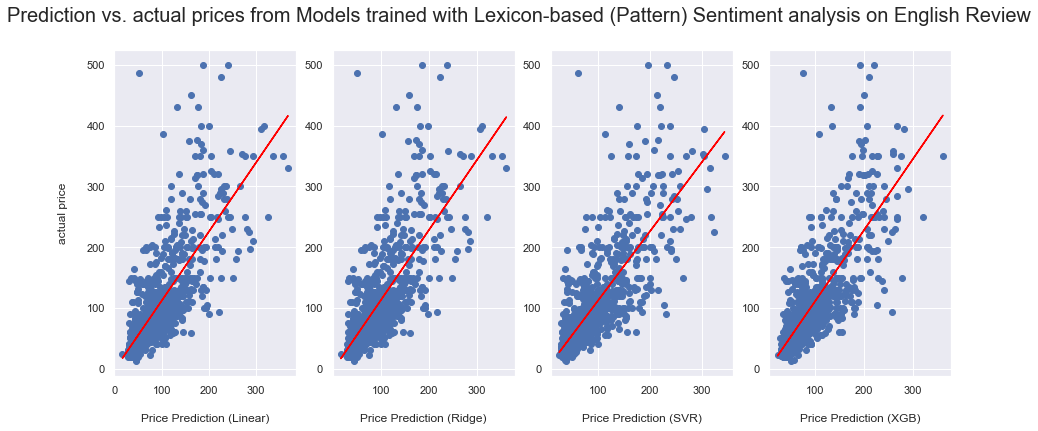

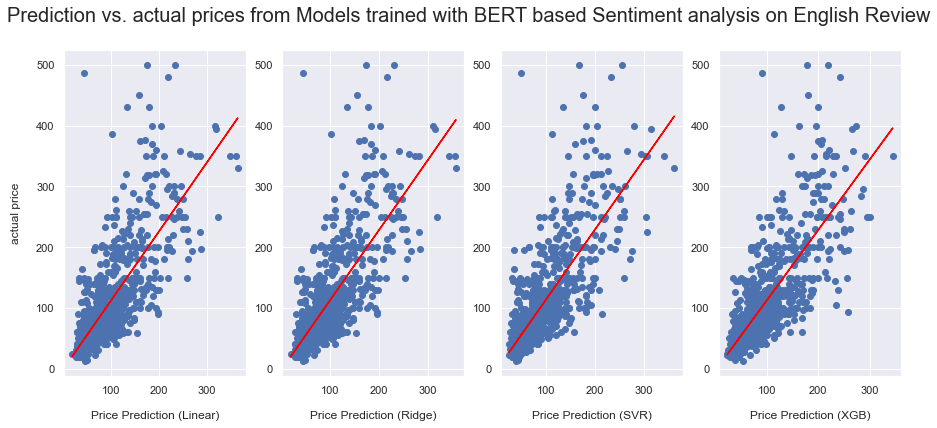

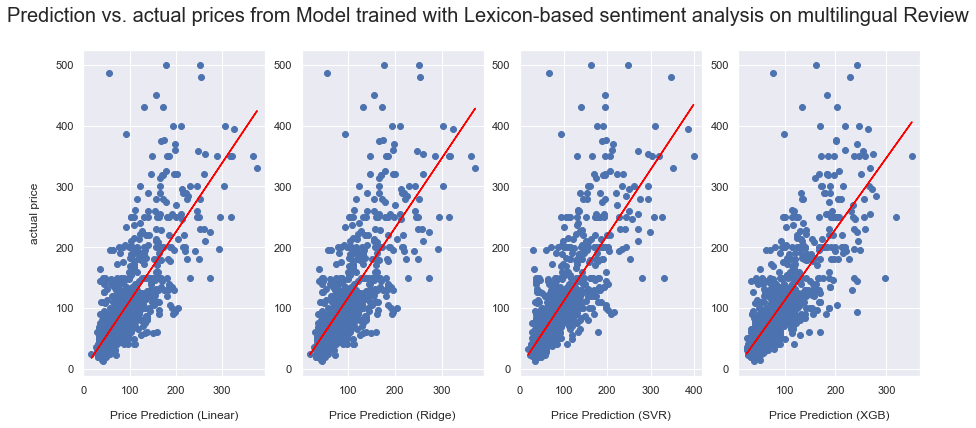

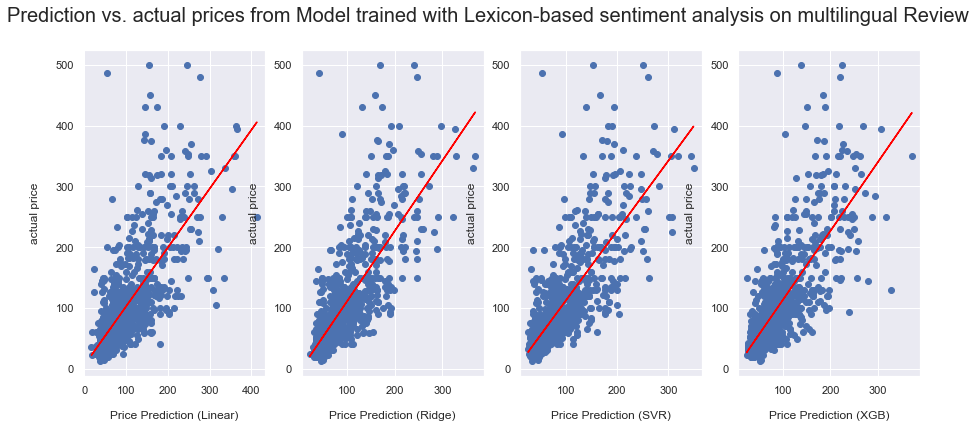

In [553]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15, 6))



axes[0].scatter(linear_eng_pattern, true)
axes[0].plot(linear_eng_pattern, a_linear_eng_pattern*linear_eng_pattern+b_linear_eng_pattern,color="red") 
axes[0].set_xlabel('Price Prediction (Linear)', labelpad = 18)
axes[0].set_ylabel('actual price', labelpad = 18)
#axes[0].set_title('Model trained with Lexicon-based sentiment analysis on english Review',fontsize=15,ha='center')

axes[1].scatter( ridge_eng_pattern,true)
axes[1].plot(ridge_eng_pattern, a_ridge_eng_pattern*ridge_eng_pattern+b_ridge_eng_pattern,color="red") 
axes[1].set_xlabel('Price Prediction (Ridge)', labelpad = 18)
#axes[1].set_ylabel('actual price', labelpad = 15)
#axes[1].set_title('Model trained with Lexicon-based sentiment analysis on english Review',fontsize=15,ha='center')


axes[2].scatter( svr_eng_pattern,true)
axes[2].plot(svr_eng_pattern, a_svr_eng_pattern*svr_eng_pattern+b_svr_eng_pattern,color="red") 
axes[2].set_xlabel('Price Prediction (SVR)', labelpad = 18)
#axes[2].set_ylabel('actual price', labelpad = 15)




axes[3].scatter( XGB_eng_pattern,true)
axes[3].plot(XGB_eng_pattern, a_XGB_eng_pattern*XGB_eng_pattern+b_XGB_eng_pattern,color="red") 
axes[3].set_xlabel('Price Prediction (XGB)', labelpad = 18)
#axes[3].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual prices from Models trained with Lexicon-based (Pattern) Sentiment analysis on English Review',fontsize=20,
             ha='center')

fig.savefig('error analysis-english Lexicon.png')
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15, 6))



axes[0].scatter(linear_eng_BERT, true)
axes[0].plot(linear_eng_BERT, a_linear_eng_BERT*linear_eng_BERT+b_linear_eng_BERT,color="red") 
axes[0].set_xlabel('Price Prediction (Linear)', labelpad = 15)
axes[0].set_ylabel('actual price', labelpad = 15)
#axes[0][0].set_title('Model trained with bert-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')

axes[1].scatter( ridge_eng_BERT,true)
axes[1].plot(ridge_eng_BERT, a_ridge_eng_BERT*ridge_eng_BERT+b_ridge_eng_BERT,color="red") 
axes[1].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
#axes[1].set_ylabel('actual price', labelpad = 15)
#axes[1].set_title('Model trained with bert-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')


axes[2].scatter( svr_eng_BERT,true)
axes[2].plot(svr_eng_BERT, a_svr_eng_BERT*svr_eng_BERT+b_svr_eng_BERT,color="red") 
axes[2].set_xlabel('Price Prediction (SVR)', labelpad = 15)
#axes[2].set_ylabel('actual price', labelpad = 15)




axes[3].scatter( XGB_eng_BERT,true)
axes[3].plot(XGB_eng_BERT, a_XGB_eng_BERT*XGB_eng_BERT+b_XGB_eng_BERT,color="red") 
axes[3].set_xlabel('Price Prediction (XGB)', labelpad = 15)
#axes[3].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual prices from Models trained with BERT based Sentiment analysis on English Review',fontsize=20,
             ha='center')
plt.show()

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15, 6))




axes[0].scatter(linear_multi_Pattern, true)
axes[0].plot(linear_multi_Pattern, a_multi_Pattern_Linear*linear_multi_Pattern+b_multi_Pattern_Linear,color="red") 
axes[0].set_xlabel('Price Prediction (Linear)', labelpad = 15)
axes[0].set_ylabel('actual price', labelpad = 15)
#axes[0].set_title('Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')

axes[1].scatter( ridge_multi_Pattern,true)
axes[1].plot(ridge_multi_Pattern, a_multi_Pattern_ridge*ridge_multi_Pattern+b_multi_Pattern_svr,color="red") 
axes[1].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
#axes[1].set_ylabel('actual price', labelpad = 15)
#axes[1].set_title('Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')


axes[2].scatter( svr_multi_Pattern,true)
axes[2].plot(svr_multi_Pattern, a_multi_Pattern_svr*svr_multi_Pattern+b_multi_Pattern_svr,color="red") 
axes[2].set_xlabel('Price Prediction (SVR)', labelpad = 15)
#axes[2].set_ylabel('actual price', labelpad = 15)




axes[3].scatter( XGB_multi_Pattern,true)
axes[3].plot(XGB_multi_Pattern, a_multi_Pattern_XGB*XGB_multi_Pattern+b_multi_Pattern_XGB,color="red") 
axes[3].set_xlabel('Price Prediction (XGB)', labelpad = 15)
#axes[3].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual prices from Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=20,
             ha='center')
plt.show()
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15, 6))



axes[0].scatter(multilingual_BertLinear, true)
axes[0].plot(multilingual_BertLinear, a_multilingual_Bert_Linear*multilingual_BertLinear+b_multilingual_Bert_Linear,color="red") 
axes[0].set_xlabel('Price Prediction (Linear)', labelpad = 15)
axes[0].set_ylabel('actual price', labelpad = 15)
#axes[0].set_title('Model trained with LBRT-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')

axes[1].scatter( multilingual_Bert_Ridge,true)
axes[1].plot(multilingual_Bert_Ridge, a_multilingual_Bert_Ridge*multilingual_Bert_Ridge+b_multilingual_Bert_Ridge,color="red") 
axes[1].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
axes[1].set_ylabel('actual price', labelpad = 15)
#axes[1].set_title('Model trained with BERT-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')


axes[2].scatter( multilingual_Bert_SVR,true)
axes[2].plot(multilingual_Bert_SVR, a_multilingual_Bert_SVR*multilingual_Bert_SVR+b_multilingual_Bert_SVR,color="red") 
axes[2].set_xlabel('Price Prediction (SVR)', labelpad = 15)
axes[2].set_ylabel('actual price', labelpad = 15)




axes[3].scatter( multilingual_Bert_XGB,true)
axes[3].plot(multilingual_Bert_XGB, a_multilingual_Bert_XGB*multilingual_Bert_XGB+b_multilingual_Bert_XGB,color="red") 
axes[3].set_xlabel('Price Prediction (XGB)', labelpad = 15)
axes[3].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual prices from Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=20,
             ha='center')
plt.show()

fig.savefig('error analysis.png')

[[ 45.13636955]
 [144.05692555]
 [ 43.87970676]
 ...
 [ 87.58479294]
 [111.34780221]
 [ 55.10500353]]


<Figure size 1800x1440 with 0 Axes>

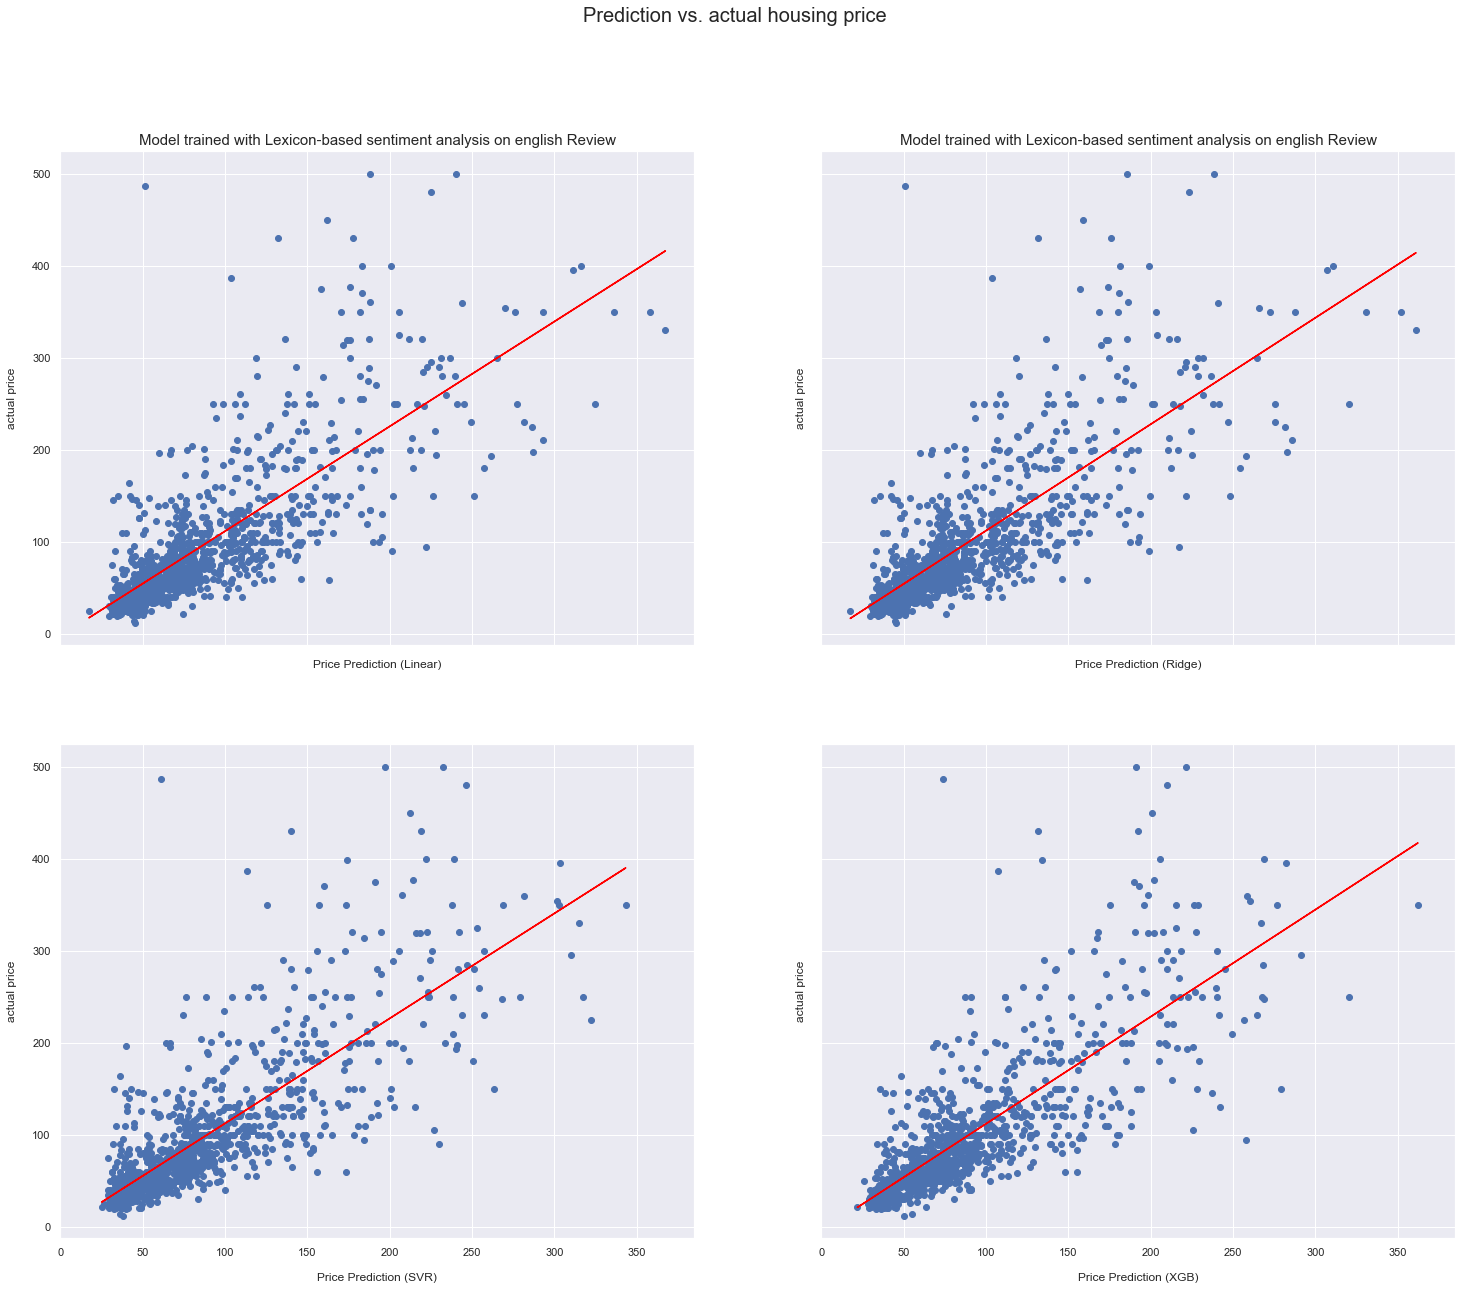

In [374]:
#find line of best fit---English Pattern


linear_eng_pattern =np.squeeze(English_Pattern_Linear_best_y_pred)
ridge_eng_pattern = np.squeeze(English_PatternRidge_best_y_pred)
svr_eng_pattern =np.squeeze(English_Pattern_SVR_best_y_pred)
XGB_eng_pattern = np.squeeze(English_Pattern_XGB_best_y_pred)


print(English_Pattern_Linear_best_y_pred)

a_linear_eng_pattern, b_linear_eng_pattern = np.polyfit(linear_eng_pattern ,true, 1)
a_ridge_eng_pattern , b_ridge_eng_pattern = np.polyfit(ridge_eng_pattern,true, 1)
a_svr_eng_pattern, b_svr_eng_pattern = np.polyfit(svr_eng_pattern ,true, 1)
a_XGB_eng_pattern, b_XGB_eng_pattern= np.polyfit(XGB_eng_pattern, true,1)
g = plt.figure() 
g, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)



axes[0][0].scatter(linear_eng_pattern, true)
axes[0][0].plot(linear_eng_pattern, a_linear_eng_pattern*linear_eng_pattern+b_linear_eng_pattern,color="red") 
axes[0][0].set_xlabel('Price Prediction (Linear)', labelpad = 15)
axes[0][0].set_ylabel('actual price', labelpad = 15)
axes[0][0].set_title('Model trained with Lexicon-based sentiment analysis on english Review',fontsize=15,
             ha='center')

axes[0][1].scatter( ridge_eng_pattern,true)
axes[0][1].plot(ridge_eng_pattern, a_ridge_eng_pattern*ridge_eng_pattern+b_ridge_eng_pattern,color="red") 
axes[0][1].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
axes[0][1].set_ylabel('actual price', labelpad = 15)
axes[0][1].set_title('Model trained with Lexicon-based sentiment analysis on english Review',fontsize=15,
             ha='center')


axes[1][0].scatter( svr_eng_pattern,true)
axes[1][0].plot(svr_eng_pattern, a_svr_eng_pattern*svr_eng_pattern+b_svr_eng_pattern,color="red") 
axes[1][0].set_xlabel('Price Prediction (SVR)', labelpad = 15)
axes[1][0].set_ylabel('actual price', labelpad = 15)




axes[1][1].scatter( XGB_eng_pattern,true)
axes[1][1].plot(XGB_eng_pattern, a_XGB_eng_pattern*XGB_eng_pattern+b_XGB_eng_pattern,color="red") 
axes[1][1].set_xlabel('Price Prediction (XGB)', labelpad = 15)
axes[1][1].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual housing price',fontsize=20,
             ha='center')
plt.show()

<Figure size 1800x1440 with 0 Axes>

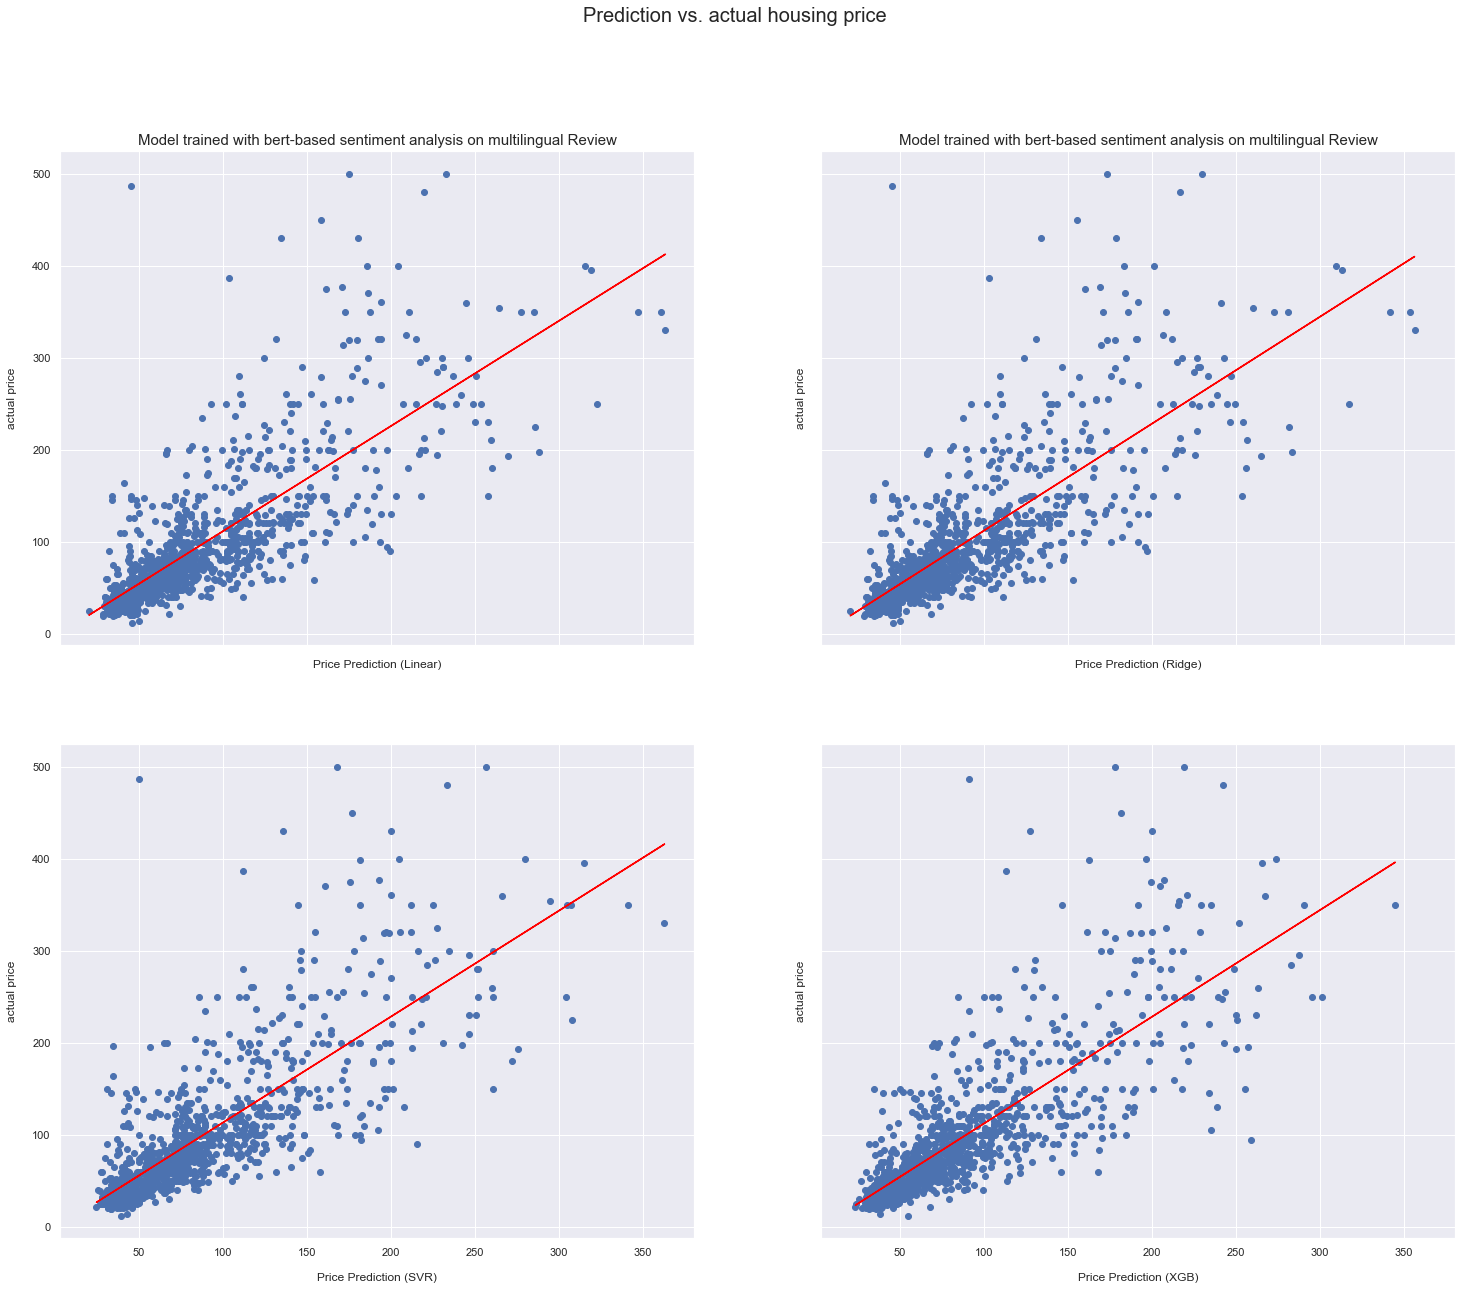

In [365]:
#find line of best fit---English BERT


linear_eng_BERT =np.squeeze(English_BertLinear_best_y_pred )
ridge_eng_BERT = np.squeeze(English_Bert_Ridge_best_y_pred)
svr_eng_BERT =np.squeeze(English_Bert_SVR_best_y_pred)
XGB_eng_BERT = np.squeeze(English_BertXGB_best_y_pred)

a_linear_eng_BERT, b_linear_eng_BERT = np.polyfit(linear_eng_BERT ,true, 1)
a_ridge_eng_BERT , b_ridge_eng_BERT = np.polyfit(ridge_eng_BERT,true, 1)
a_svr_eng_BERT, b_svr_eng_BERT = np.polyfit(svr_eng_BERT ,true, 1)
a_XGB_eng_BERT, b_XGB_eng_BERT= np.polyfit(XGB_eng_BERT, true,1)
g = plt.figure() 
g, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)



axes[0][0].scatter(linear_eng_BERT, true)
axes[0][0].plot(linear_eng_BERT, a_linear_eng_BERT*linear_eng_BERT+b_linear_eng_BERT,color="red") 
axes[0][0].set_xlabel('Price Prediction (Linear)', labelpad = 15)
axes[0][0].set_ylabel('actual price', labelpad = 15)
axes[0][0].set_title('Model trained with bert-based sentiment analysis on multilingual Review',fontsize=15,
             ha='center')

axes[0][1].scatter( ridge_eng_BERT,true)
axes[0][1].plot(ridge_eng_BERT, a_ridge_eng_BERT*ridge_eng_BERT+b_ridge_eng_BERT,color="red") 
axes[0][1].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
axes[0][1].set_ylabel('actual price', labelpad = 15)
axes[0][1].set_title('Model trained with bert-based sentiment analysis on multilingual Review',fontsize=15,
             ha='center')


axes[1][0].scatter( svr_eng_BERT,true)
axes[1][0].plot(svr_eng_BERT, a_svr_eng_BERT*svr_eng_BERT+b_svr_eng_BERT,color="red") 
axes[1][0].set_xlabel('Price Prediction (SVR)', labelpad = 15)
axes[1][0].set_ylabel('actual price', labelpad = 15)




axes[1][1].scatter( XGB_eng_BERT,true)
axes[1][1].plot(XGB_eng_BERT, a_XGB_eng_BERT*XGB_eng_BERT+b_XGB_eng_BERT,color="red") 
axes[1][1].set_xlabel('Price Prediction (XGB)', labelpad = 15)
axes[1][1].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual housing price',fontsize=20,
             ha='center')
plt.show()

<Figure size 1800x1440 with 0 Axes>

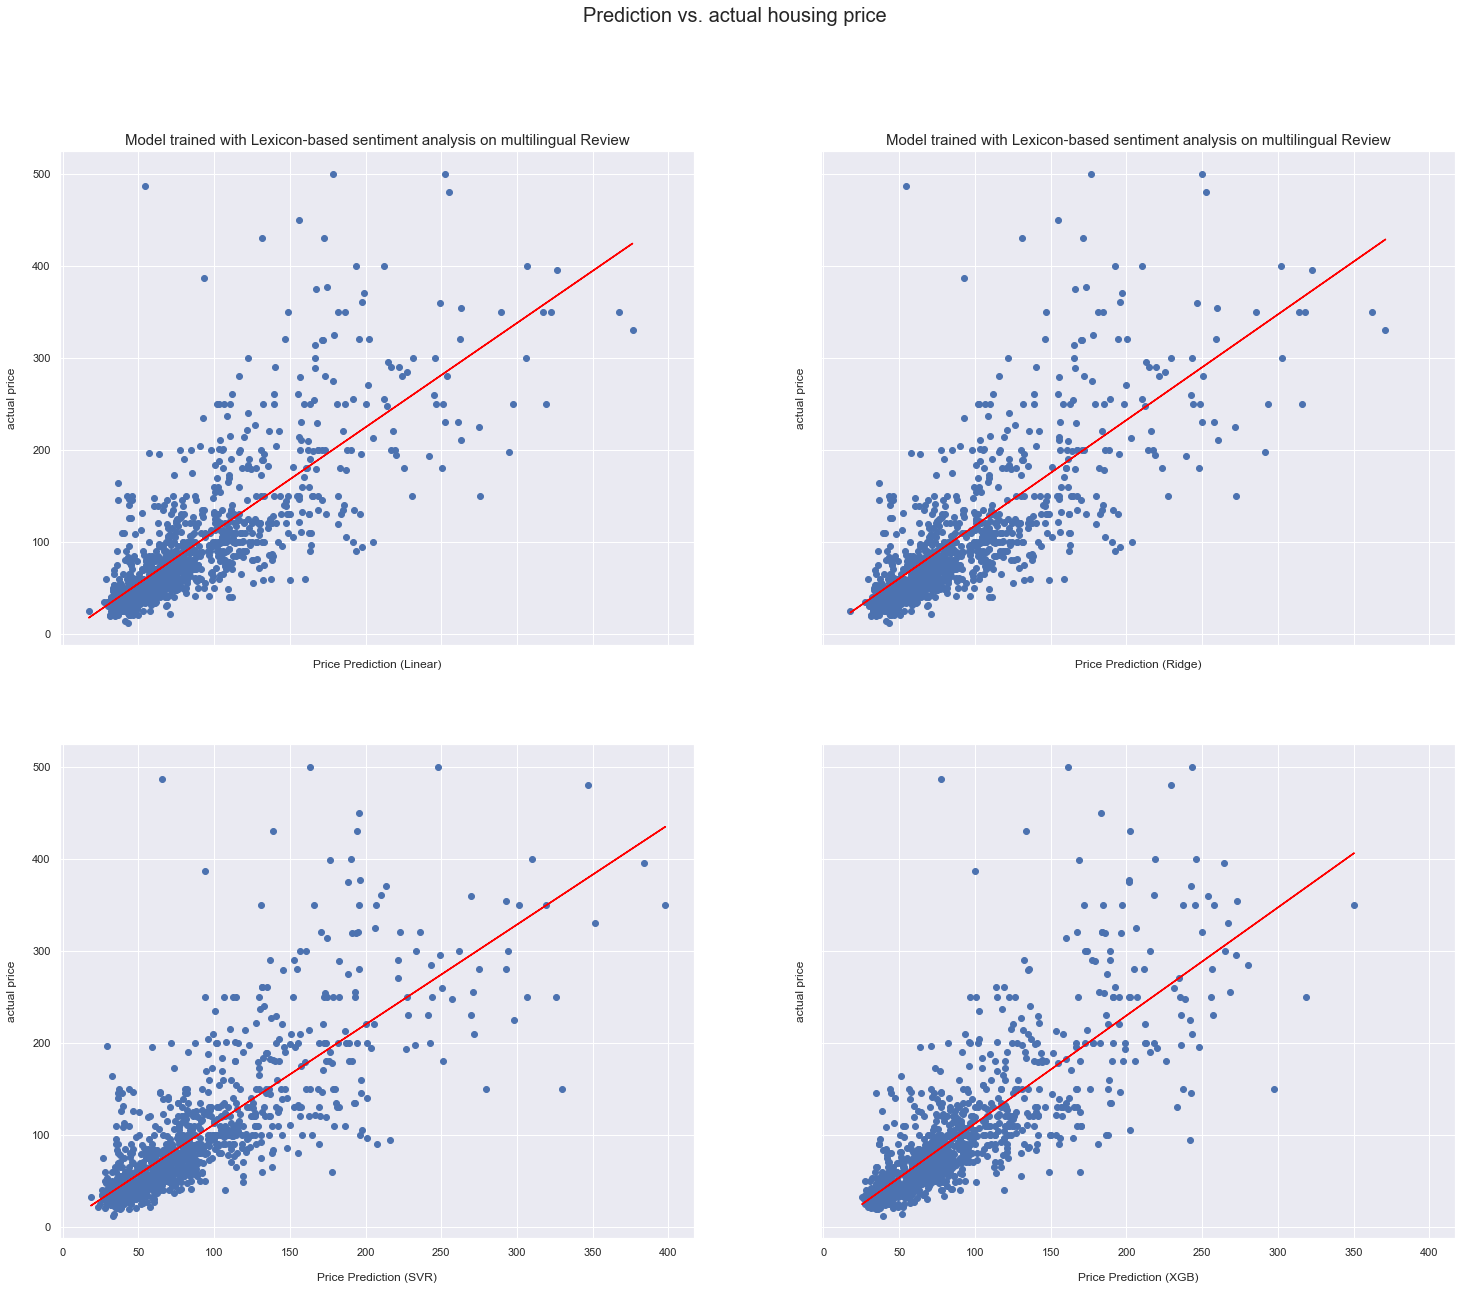

In [361]:
#find line of best fit---Multilingual lexicon


linear_multi_Pattern =np.squeeze(Englishfrench_Pattern_Linear_best_y_pred)
ridge_multi_Pattern = np.squeeze(EnglishFrench_PatternRidge_best_y_pred)
svr_multi_Pattern =np.squeeze(Englishfrench_Pattern_SVR_bestt_y_pred)
XGB_multi_Pattern = np.squeeze(EnglishFrench_PatternXGB_best_y_pred)

a_multi_Pattern_Linear, b_multi_Pattern_Linear = np.polyfit(linear_multi_Pattern,true, 1)
a_multi_Pattern_ridge, b_multi_Pattern_ridge= np.polyfit(ridge_multi_Pattern,true, 1)
a_multi_Pattern_svr, b_multi_Pattern_svr = np.polyfit(svr_multi_Pattern ,true, 1)
a_multi_Pattern_XGB, b_multi_Pattern_XGB= np.polyfit(XGB_multi_Pattern, true,1)
g = plt.figure() 
g, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)



axes[0][0].scatter(linear_multi_Pattern, true)
axes[0][0].plot(linear_multi_Pattern, a_multi_Pattern_Linear*linear_multi_Pattern+b_multi_Pattern_Linear,color="red") 
axes[0][0].set_xlabel('Price Prediction (Linear)', labelpad = 15)
axes[0][0].set_ylabel('actual price', labelpad = 15)
axes[0][0].set_title('Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=15,
             ha='center')

axes[0][1].scatter( ridge_multi_Pattern,true)
axes[0][1].plot(ridge_multi_Pattern, a_multi_Pattern_ridge*ridge_multi_Pattern+b_multi_Pattern_svr,color="red") 
axes[0][1].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
axes[0][1].set_ylabel('actual price', labelpad = 15)
axes[0][1].set_title('Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=15,
             ha='center')


axes[1][0].scatter( svr_multi_Pattern,true)
axes[1][0].plot(svr_multi_Pattern, a_multi_Pattern_svr*svr_multi_Pattern+b_multi_Pattern_svr,color="red") 
axes[1][0].set_xlabel('Price Prediction (SVR)', labelpad = 15)
axes[1][0].set_ylabel('actual price', labelpad = 15)




axes[1][1].scatter( XGB_multi_Pattern,true)
axes[1][1].plot(XGB_multi_Pattern, a_multi_Pattern_XGB*XGB_multi_Pattern+b_multi_Pattern_XGB,color="red") 
axes[1][1].set_xlabel('Price Prediction (XGB)', labelpad = 15)
axes[1][1].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual housing price',fontsize=20,
             ha='center')
plt.show()

<Figure size 1800x1440 with 0 Axes>

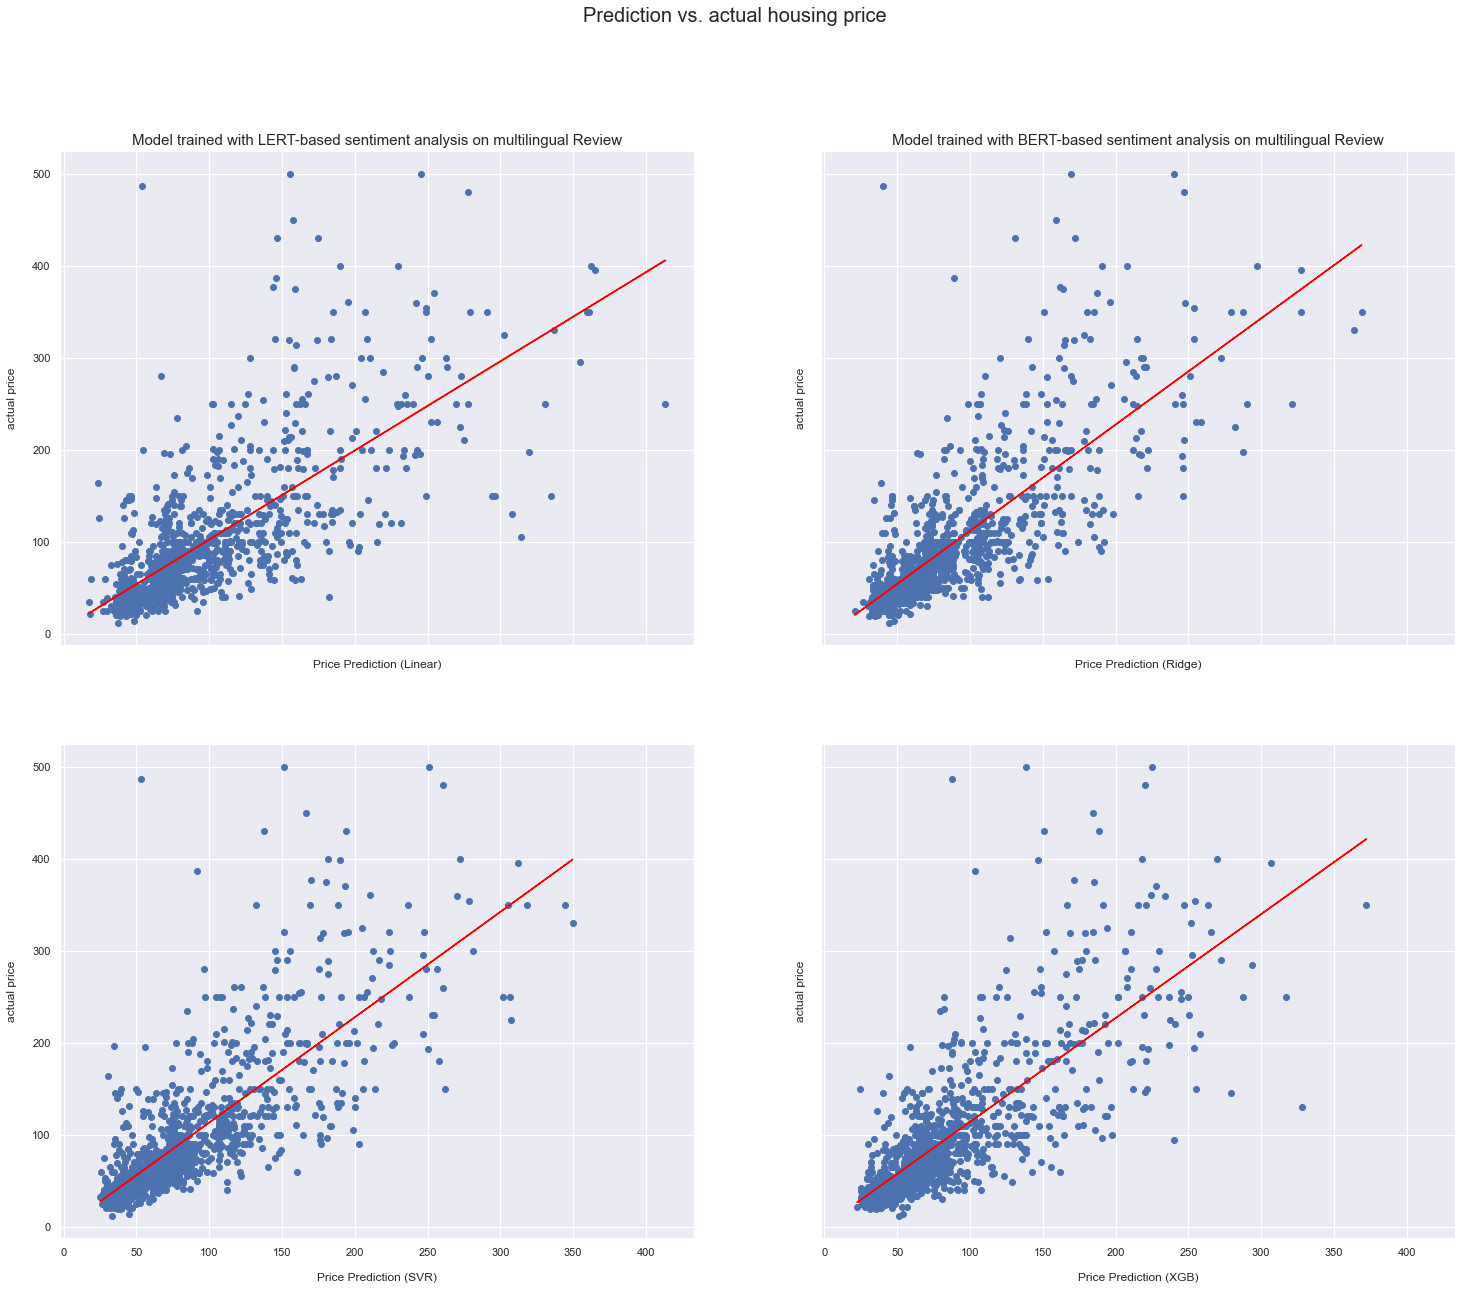

In [543]:
#find line of best fit---Multilingual BERT 
a_multilingual_Bert_Ridge, b_multilingual_Bert_Ridge = np.polyfit(multilingual_Bert_Ridge,true, 1)
a_multilingual_Bert_SVR, b_multilingual_Bert_SVR= np.polyfit( multilingual_Bert_SVR,true, 1)
a_multilingual_Bert_Linear, b_multilingual_Bert_Linear = np.polyfit(multilingual_BertLinear ,true, 1)
a_multilingual_Bert_XGB, b_multilingual_Bert_XGB= np.polyfit(multilingual_Bert_XGB, true,1)
f = plt.figure()    

#f.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
f, axes = plt.subplots(nrows = 2, ncols = 2, sharex=True, sharey = True)

axes[0][0].scatter(multilingual_BertLinear, true)
axes[0][0].plot(multilingual_BertLinear, a_multilingual_Bert_Linear*multilingual_BertLinear+b_multilingual_Bert_Linear,color="red") 
axes[0][0].set_xlabel('Price Prediction (Linear)', labelpad = 15)
axes[0][0].set_ylabel('actual price', labelpad = 15)
axes[0][0].set_title('Model trained with LERT-based sentiment analysis on multilingual Review',fontsize=15,
             ha='center')

axes[0][1].scatter( multilingual_Bert_Ridge,true)
axes[0][1].plot(multilingual_Bert_Ridge, a_multilingual_Bert_Ridge*multilingual_Bert_Ridge+b_multilingual_Bert_Ridge,color="red") 
axes[0][1].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
axes[0][1].set_ylabel('actual price', labelpad = 15)
axes[0][1].set_title('Model trained with BERT-based sentiment analysis on multilingual Review',fontsize=15,
             ha='center')


axes[1][0].scatter( multilingual_Bert_SVR,true)
axes[1][0].plot(multilingual_Bert_SVR, a_multilingual_Bert_SVR*multilingual_Bert_SVR+b_multilingual_Bert_SVR,color="red") 
axes[1][0].set_xlabel('Price Prediction (SVR)', labelpad = 15)
axes[1][0].set_ylabel('actual price', labelpad = 15)




axes[1][1].scatter( multilingual_Bert_XGB,true)
axes[1][1].plot(multilingual_Bert_XGB, a_multilingual_Bert_XGB*multilingual_Bert_XGB+b_multilingual_Bert_XGB,color="red") 
axes[1][1].set_xlabel('Price Prediction (XGB)', labelpad = 15)
axes[1][1].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual housing price',fontsize=20,
             ha='center')
plt.show()
#add points to plot
#plt.scatter(true, multilingual_Bert_Ridge)
#plt.scatter(true, multilingual_Bert_SVR)
#add line of best fit to plot
#plt.plot(true, a*true+b)    
#plt.plot(true, c*true+d)   

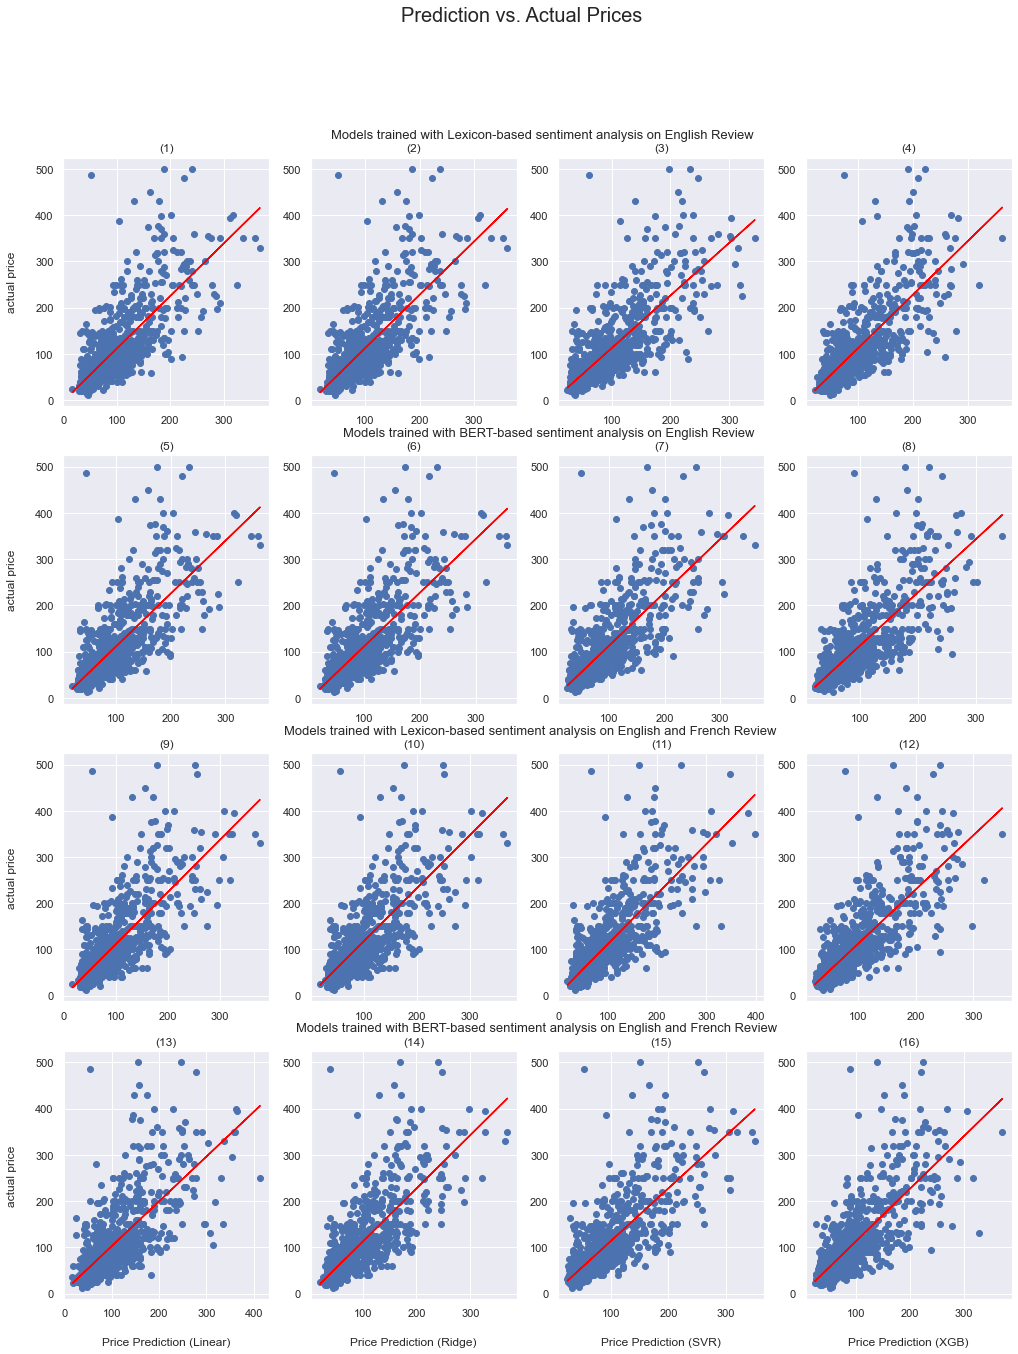

In [544]:
import matplotlib.patches as patches
left, width = 0.65, 1.5
bottom, height =0.7, 1.83
right = left + width
top = bottom + 1/5*height

left_multi, width_multi = 0.66, 1.6
bottom_multi, height_multi =0.7, 1.83
right_multi = left_multi + width_multi
top_multi = bottom_multi + 1/5*height_multi


fig, axes = plt.subplots(ncols=4, nrows=4, figsize=(17, 21))# sharex=True, sharey = True)

axes = np.ravel(axes)
#col_name = ['accommodates','minimum_nights','number_of_reviews','reviews_per_month','bedroom_share']
#for i, c in zip(range(9), col_name):
#    english_clean.plot.scatter(ax=axes[i], x=c, y='price', sharey=True, colorbar=False, c='red')


#pattern english
axes[0].scatter(linear_eng_pattern, true)
axes[0].plot(linear_eng_pattern, a_linear_eng_pattern*linear_eng_pattern+b_linear_eng_pattern,color="red") 
#axes[0].set_xlabel('(1)', labelpad = 18)
axes[0].set_ylabel('actual price', labelpad = 18)
axes[0].set_title('(1)',fontsize=12,ha='center')

axes[1].scatter( ridge_eng_pattern,true)
axes[1].plot(ridge_eng_pattern, a_ridge_eng_pattern*ridge_eng_pattern+b_ridge_eng_pattern,color="red") 
#axes[1].set_xlabel('(2)', labelpad = 18)
#axes[1].set_ylabel('actual price', labelpad = 15)
axes[1].set_title('(2)',fontsize=12,ha='center')
axes[1].text(right, top, 'Models trained with Lexicon-based sentiment analysis on English Review', horizontalalignment='right', verticalalignment='bottom',transform=axes[1].transAxes,font = {'size': 13})


axes[2].scatter( svr_eng_pattern,true)
axes[2].plot(svr_eng_pattern, a_svr_eng_pattern*svr_eng_pattern+b_svr_eng_pattern,color="red") 
axes[2].set_title('(3)',fontsize=12,ha='center')
#axes[2].set_xlabel('(3)', labelpad = 18)
#axes[2].set_ylabel('actual price', labelpad = 15)




axes[3].scatter( XGB_eng_pattern,true)
axes[3].plot(XGB_eng_pattern, a_XGB_eng_pattern*XGB_eng_pattern+b_XGB_eng_pattern,color="red") 
axes[3].set_title('(4)',fontsize=12,ha='center')
#axes[3].set_xlabel('Price Prediction (XGB)', labelpad = 15)


#bert English 

axes[4].scatter(linear_eng_BERT, true)
axes[4].plot(linear_eng_BERT, a_linear_eng_BERT*linear_eng_BERT+b_linear_eng_BERT,color="red") 
#axes[4].set_xlabel('(4)', labelpad = 18)
axes[4].set_ylabel('actual price', labelpad = 18)
axes[4].set_title('(5)',fontsize=12,ha='center')
#axes[0][0].set_title('Model trained with bert-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')

axes[5].scatter( ridge_eng_BERT,true)
axes[5].plot(ridge_eng_BERT, a_ridge_eng_BERT*ridge_eng_BERT+b_ridge_eng_BERT,color="red") 
#axes[5].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
#axes[1].set_ylabel('actual price', labelpad = 15)
#axes[1].set_title('Model trained with bert-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')
axes[5].text(right, top, 'Models trained with BERT-based sentiment analysis on English Review', horizontalalignment='right', verticalalignment='bottom',transform=axes[5].transAxes,font = {'size': 13})
axes[5].set_title('(6)',fontsize=12,ha='center')


axes[6].scatter( svr_eng_BERT,true)
axes[6].plot(svr_eng_BERT, a_svr_eng_BERT*svr_eng_BERT+b_svr_eng_BERT,color="red") 
axes[6].set_title('(7)',fontsize=12,ha='center')
#axes[6].set_xlabel('(5)', labelpad = 18)
#axes[2].set_ylabel('actual price', labelpad = 15)




axes[7].scatter( XGB_eng_BERT,true)
axes[7].plot(XGB_eng_BERT, a_XGB_eng_BERT*XGB_eng_BERT+b_XGB_eng_BERT,color="red") 
axes[7].set_title('(8)',fontsize=12,ha='center')
#axes[7].set_xlabel('(6)', labelpad = 18)



#Pattern multilingual

axes[8].scatter(linear_multi_Pattern, true)
axes[8].plot(linear_multi_Pattern, a_multi_Pattern_Linear*linear_multi_Pattern+b_multi_Pattern_Linear,color="red") 
#axes[8].set_xlabel('(7)', labelpad = 18)
axes[8].set_ylabel('actual price', labelpad = 18)
axes[8].set_title('(9)',fontsize=12,ha='center')
#axes[0].set_title('Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')

axes[9].scatter( ridge_multi_Pattern,true)
axes[9].plot(ridge_multi_Pattern, a_multi_Pattern_ridge*ridge_multi_Pattern+b_multi_Pattern_svr,color="red") 
#axes[9].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
#axes[1].set_ylabel('actual price', labelpad = 15)
#axes[1].set_title('Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')
axes[9].text(right_multi, top_multi, 'Models trained with Lexicon-based sentiment analysis on English and French Review', horizontalalignment='right', verticalalignment='bottom',transform=axes[9].transAxes,font = {'size': 13})
axes[9].set_title('(10)',fontsize=12,ha='center')


axes[10].scatter( svr_multi_Pattern,true)
axes[10].plot(svr_multi_Pattern, a_multi_Pattern_svr*svr_multi_Pattern+b_multi_Pattern_svr,color="red") 
axes[10].set_title('(11)',fontsize=12,ha='center')
#axes[10].set_xlabel('Price Prediction (SVR)', labelpad = 15)
#axes[2].set_ylabel('actual price', labelpad = 15)




axes[11].scatter( XGB_multi_Pattern,true)
axes[11].plot(XGB_multi_Pattern, a_multi_Pattern_XGB*XGB_multi_Pattern+b_multi_Pattern_XGB,color="red")
axes[11].set_title('(12)',fontsize=12,ha='center')
#axes[11].set_xlabel('Price Prediction (XGB)', labelpad = 15)


axes[12].scatter(multilingual_BertLinear, true)
axes[12].plot(multilingual_BertLinear, a_multilingual_Bert_Linear*multilingual_BertLinear+b_multilingual_Bert_Linear,color="red") 
axes[12].set_xlabel('Price Prediction (Linear)', labelpad = 18)
axes[12].set_ylabel('actual price', labelpad = 18)
axes[12].set_title('(13)',fontsize=12,ha='center')
#axes[0].set_title('Model trained with LBRT-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')

axes[13].scatter( multilingual_Bert_Ridge,true)
axes[13].plot(multilingual_Bert_Ridge, a_multilingual_Bert_Ridge*multilingual_Bert_Ridge+b_multilingual_Bert_Ridge,color="red") 
axes[13].set_xlabel('Price Prediction (Ridge)', labelpad = 18)
#axes[13].set_ylabel('actual price', labelpad = 15)
#axes[1].set_title('Model trained with BERT-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')
axes[13].text(right_multi, top_multi, 'Models trained with BERT-based sentiment analysis on English and French Review', horizontalalignment='right', verticalalignment='bottom',transform=axes[13].transAxes,font = {'size': 13})
axes[13].set_title('(14)',fontsize=12,ha='center')

axes[14].scatter( multilingual_Bert_SVR,true)
axes[14].plot(multilingual_Bert_SVR, a_multilingual_Bert_SVR*multilingual_Bert_SVR+b_multilingual_Bert_SVR,color="red") 
axes[14].set_xlabel('Price Prediction (SVR)', labelpad = 18)
axes[14].set_title('(15)',fontsize=12,ha='center')
#axes[14].set_ylabel('actual price', labelpad = 15)




axes[15].scatter( multilingual_Bert_XGB,true)
axes[15].plot(multilingual_Bert_XGB, a_multilingual_Bert_XGB*multilingual_Bert_XGB+b_multilingual_Bert_XGB,color="red") 
axes[15].set_xlabel('Price Prediction (XGB)', labelpad = 18)
axes[15].set_title('(16)',fontsize=12,ha='center')
#axes[15].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. Actual Prices',fontsize=20,
             ha='center')

plt.show()


fig.savefig('error analysis1.png')

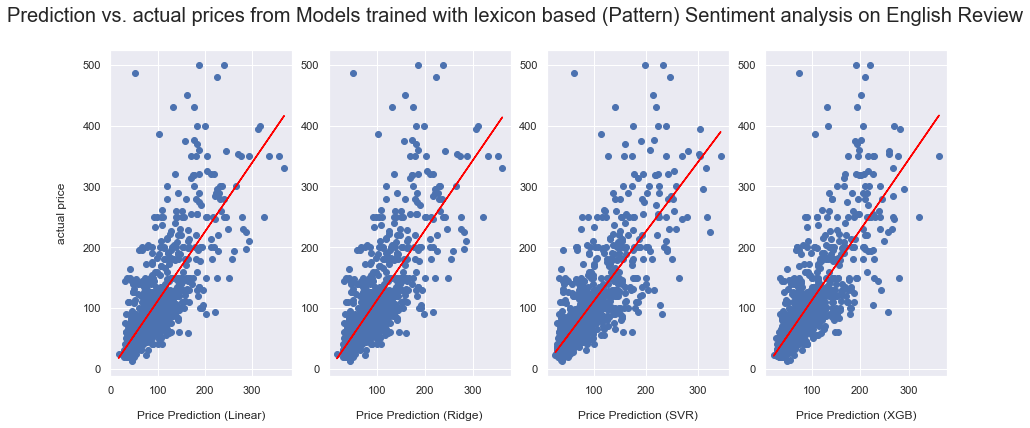

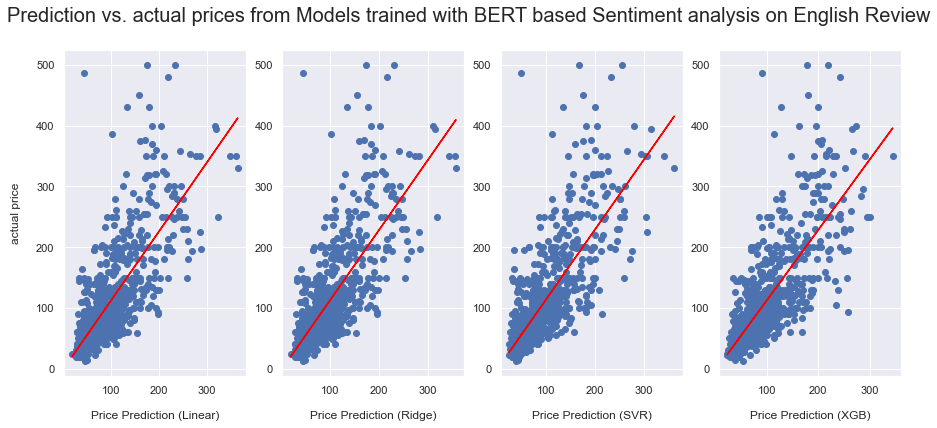

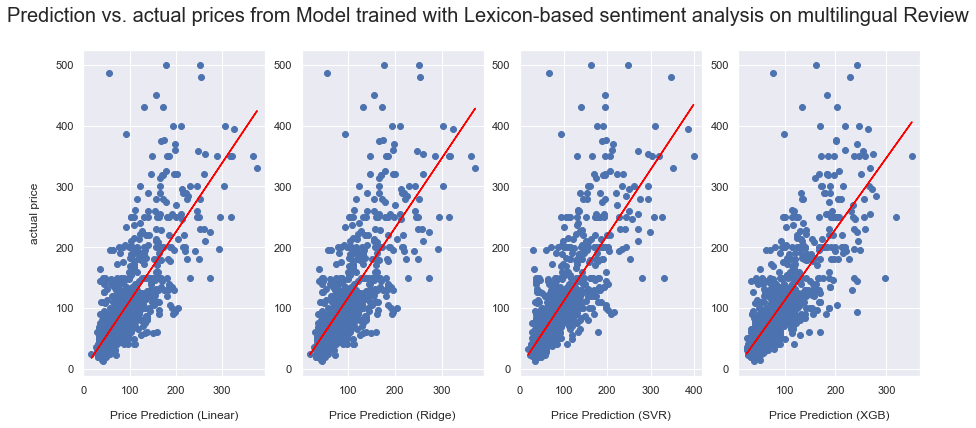

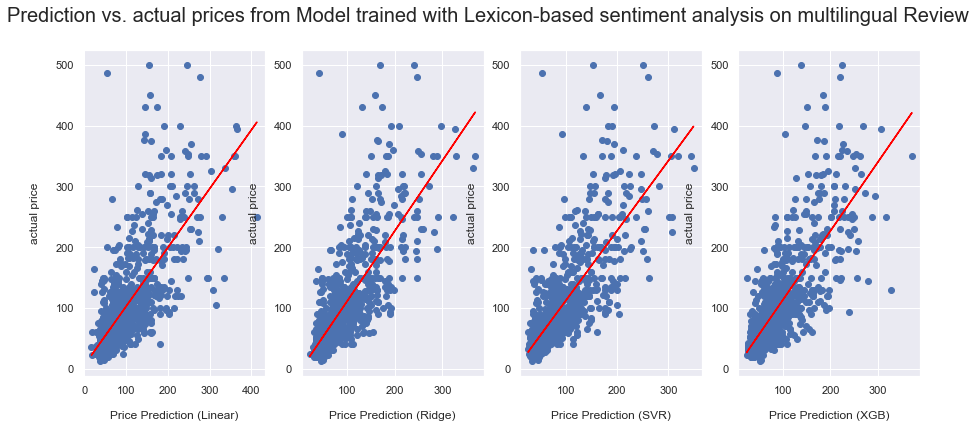

In [546]:
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15, 6))



axes[0].scatter(linear_eng_pattern, true)
axes[0].plot(linear_eng_pattern, a_linear_eng_pattern*linear_eng_pattern+b_linear_eng_pattern,color="red") 
axes[0].set_xlabel('Price Prediction (Linear)', labelpad = 15)
axes[0].set_ylabel('actual price', labelpad = 15)
#axes[0].set_title('Model trained with Lexicon-based sentiment analysis on english Review',fontsize=15,ha='center')

axes[1].scatter( ridge_eng_pattern,true)
axes[1].plot(ridge_eng_pattern, a_ridge_eng_pattern*ridge_eng_pattern+b_ridge_eng_pattern,color="red") 
axes[1].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
#axes[1].set_ylabel('actual price', labelpad = 15)
#axes[1].set_title('Model trained with Lexicon-based sentiment analysis on english Review',fontsize=15,ha='center')


axes[2].scatter( svr_eng_pattern,true)
axes[2].plot(svr_eng_pattern, a_svr_eng_pattern*svr_eng_pattern+b_svr_eng_pattern,color="red") 
axes[2].set_xlabel('Price Prediction (SVR)', labelpad = 15)
#axes[2].set_ylabel('actual price', labelpad = 15)




axes[3].scatter( XGB_eng_pattern,true)
axes[3].plot(XGB_eng_pattern, a_XGB_eng_pattern*XGB_eng_pattern+b_XGB_eng_pattern,color="red") 
axes[3].set_xlabel('Price Prediction (XGB)', labelpad = 15)
#axes[3].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual prices from Models trained with lexicon based (Pattern) Sentiment analysis on English Review',fontsize=20,
             ha='center')

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15, 6))



axes[0].scatter(linear_eng_BERT, true)
axes[0].plot(linear_eng_BERT, a_linear_eng_BERT*linear_eng_BERT+b_linear_eng_BERT,color="red") 
axes[0].set_xlabel('Price Prediction (Linear)', labelpad = 15)
axes[0].set_ylabel('actual price', labelpad = 15)
#axes[0][0].set_title('Model trained with bert-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')

axes[1].scatter( ridge_eng_BERT,true)
axes[1].plot(ridge_eng_BERT, a_ridge_eng_BERT*ridge_eng_BERT+b_ridge_eng_BERT,color="red") 
axes[1].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
#axes[1].set_ylabel('actual price', labelpad = 15)
#axes[1].set_title('Model trained with bert-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')


axes[2].scatter( svr_eng_BERT,true)
axes[2].plot(svr_eng_BERT, a_svr_eng_BERT*svr_eng_BERT+b_svr_eng_BERT,color="red") 
axes[2].set_xlabel('Price Prediction (SVR)', labelpad = 15)
#axes[2].set_ylabel('actual price', labelpad = 15)




axes[3].scatter( XGB_eng_BERT,true)
axes[3].plot(XGB_eng_BERT, a_XGB_eng_BERT*XGB_eng_BERT+b_XGB_eng_BERT,color="red") 
axes[3].set_xlabel('Price Prediction (XGB)', labelpad = 15)
#axes[3].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual prices from Models trained with BERT based Sentiment analysis on English Review',fontsize=20,
             ha='center')
plt.show()

fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15, 6))




axes[0].scatter(linear_multi_Pattern, true)
axes[0].plot(linear_multi_Pattern, a_multi_Pattern_Linear*linear_multi_Pattern+b_multi_Pattern_Linear,color="red") 
axes[0].set_xlabel('Price Prediction (Linear)', labelpad = 15)
axes[0].set_ylabel('actual price', labelpad = 15)
#axes[0].set_title('Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')

axes[1].scatter( ridge_multi_Pattern,true)
axes[1].plot(ridge_multi_Pattern, a_multi_Pattern_ridge*ridge_multi_Pattern+b_multi_Pattern_svr,color="red") 
axes[1].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
#axes[1].set_ylabel('actual price', labelpad = 15)
#axes[1].set_title('Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')


axes[2].scatter( svr_multi_Pattern,true)
axes[2].plot(svr_multi_Pattern, a_multi_Pattern_svr*svr_multi_Pattern+b_multi_Pattern_svr,color="red") 
axes[2].set_xlabel('Price Prediction (SVR)', labelpad = 15)
#axes[2].set_ylabel('actual price', labelpad = 15)




axes[3].scatter( XGB_multi_Pattern,true)
axes[3].plot(XGB_multi_Pattern, a_multi_Pattern_XGB*XGB_multi_Pattern+b_multi_Pattern_XGB,color="red") 
axes[3].set_xlabel('Price Prediction (XGB)', labelpad = 15)
#axes[3].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual prices from Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=20,
             ha='center')
plt.show()
fig, axes = plt.subplots(ncols=4, nrows=1, figsize=(15, 6))



axes[0].scatter(multilingual_BertLinear, true)
axes[0].plot(multilingual_BertLinear, a_multilingual_Bert_Linear*multilingual_BertLinear+b_multilingual_Bert_Linear,color="red") 
axes[0].set_xlabel('Price Prediction (Linear)', labelpad = 15)
axes[0].set_ylabel('actual price', labelpad = 15)
#axes[0].set_title('Model trained with LBRT-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')

axes[1].scatter( multilingual_Bert_Ridge,true)
axes[1].plot(multilingual_Bert_Ridge, a_multilingual_Bert_Ridge*multilingual_Bert_Ridge+b_multilingual_Bert_Ridge,color="red") 
axes[1].set_xlabel('Price Prediction (Ridge)', labelpad = 15)
axes[1].set_ylabel('actual price', labelpad = 15)
#axes[1].set_title('Model trained with BERT-based sentiment analysis on multilingual Review',fontsize=15,
#             ha='center')


axes[2].scatter( multilingual_Bert_SVR,true)
axes[2].plot(multilingual_Bert_SVR, a_multilingual_Bert_SVR*multilingual_Bert_SVR+b_multilingual_Bert_SVR,color="red") 
axes[2].set_xlabel('Price Prediction (SVR)', labelpad = 15)
axes[2].set_ylabel('actual price', labelpad = 15)




axes[3].scatter( multilingual_Bert_XGB,true)
axes[3].plot(multilingual_Bert_XGB, a_multilingual_Bert_XGB*multilingual_Bert_XGB+b_multilingual_Bert_XGB,color="red") 
axes[3].set_xlabel('Price Prediction (XGB)', labelpad = 15)
axes[3].set_ylabel('actual price', labelpad = 15)
plt.suptitle('Prediction vs. actual prices from Model trained with Lexicon-based sentiment analysis on multilingual Review',fontsize=20,
             ha='center')
plt.show()

fig.savefig('error analysis.png')